# **Introduction**

### Weather Dataset Overview

- This dataset contains daily meteorological observations collected from a specific location. Each row represents a single day of weather data, capturing various meteorological variables. The objective is to analyze weather trends and predict outcomes such as rainfall based on the provided features.

### Feature Descriptions

- **Date** (date): The date of the observation.
- **Location** (categorical): The geographic location where the observation was recorded.
- **MinTemp** (numeric): Minimum temperature of the day (°C).
- **MaxTemp** (numeric): Maximum temperature of the day (°C).
- **Rainfall** (numeric): Total precipitation recorded for the day (mm).
- **Evaporation** (numeric): Amount of water evaporated (mm).
- **Sunshine** (numeric): Total hours of sunshine for the day.
- **WindGustDir** (categorical): Direction of the strongest wind gust.
- **WindGustSpeed** (numeric): Speed of the strongest wind gust (km/h).
- **WindDir9am** (categorical): Wind direction at 9 am.
- **WindDir3pm** (categorical): Wind direction at 3 pm.
- **WindSpeed9am** (numeric): Wind speed at 9 am (km/h).
- **WindSpeed3pm** (numeric): Wind speed at 3 pm (km/h).
- **Humidity9am** (numeric): Humidity percentage at 9 am.
- **Humidity3pm** (numeric): Humidity percentage at 3 pm.
- **Pressure9am** (numeric): Atmospheric pressure at 9 am (hPa).
- **Pressure3pm** (numeric): Atmospheric pressure at 3 pm (hPa).
- **Cloud9am** (numeric): Cloud cover at 9 am (measured in oktas).
- **Cloud3pm** (numeric): Cloud cover at 3 pm (measured in oktas).
- **Temp9am** (numeric): Temperature at 9 am (°C).
- **Temp3pm** (numeric): Temperature at 3 pm (°C).
- **RainToday** (categorical): Indicates whether it rained on the observation day (Yes/No).
- **RainTomorrow** (categorical): Target variable indicating whether it rained the following day (Yes/No).


# **Importing Libraries**

In this cell I will import all the sufficiencies for data handling and model creation

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid',palette='viridis')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OrdinalEncoder

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB

from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

from statsmodels.imputation import mice

from sklearn.model_selection import TimeSeriesSplit

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import precision_recall_curve, roc_curve, auc

# **Data Inspection and Imputing**

Let's just discover some data issues and structure for further alterations

In [ ]:
df = pd.read_csv('weatherAUS.csv')
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [ ]:
df.shape

(43371, 23)

As we see we got 145460 instances, with 22 independent and 1 target valeus

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43371 entries, 0 to 43370
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           43371 non-null  object 
 1   Location       43370 non-null  object 
 2   MinTemp        42854 non-null  float64
 3   MaxTemp        42990 non-null  float64
 4   Rainfall       42156 non-null  float64
 5   Evaporation    22215 non-null  float64
 6   Sunshine       16920 non-null  float64
 7   WindGustDir    38232 non-null  object 
 8   WindGustSpeed  38237 non-null  float64
 9   WindDir9am     38632 non-null  object 
 10  WindDir3pm     41203 non-null  object 
 11  WindSpeed9am   42491 non-null  float64
 12  WindSpeed3pm   41860 non-null  float64
 13  Humidity9am    42664 non-null  float64
 14  Humidity3pm    42003 non-null  float64
 15  Pressure9am    36657 non-null  float64
 16  Pressure3pm    36671 non-null  float64
 17  Cloud9am       26262 non-null  float64
 18  Cloud3

It seems like there are lots of nulls that should be taken care of accordingly. Datatypes seem alright at the first glance

In [ ]:
df.isna().sum()

Date                 0
Location             1
MinTemp            517
MaxTemp            381
Rainfall          1215
Evaporation      21156
Sunshine         26451
WindGustDir       5139
WindGustSpeed     5134
WindDir9am        4739
WindDir3pm        2168
WindSpeed9am       880
WindSpeed3pm      1511
Humidity9am        707
Humidity3pm       1368
Pressure9am       6714
Pressure3pm       6700
Cloud9am         17109
Cloud3pm         17401
Temp9am            471
Temp3pm           1134
RainToday         1215
RainTomorrow      1214
dtype: int64

So as I said, we got lots of nulls, lets first get rid of the rows, of which all columns have null values, because it means they have not been filled so there is no use of them

In [ ]:
df = df[~df.drop(columns=['Date', 'Location']).isnull().all(axis=1)]

In [ ]:
df.shape

(43258, 23)

In [ ]:
df.isna().sum()

Date                 0
Location             0
MinTemp            404
MaxTemp            268
Rainfall          1102
Evaporation      21043
Sunshine         26338
WindGustDir       5026
WindGustSpeed     5021
WindDir9am        4626
WindDir3pm        2055
WindSpeed9am       767
WindSpeed3pm      1398
Humidity9am        594
Humidity3pm       1255
Pressure9am       6601
Pressure3pm       6587
Cloud9am         16996
Cloud3pm         17288
Temp9am            358
Temp3pm           1021
RainToday         1102
RainTomorrow      1101
dtype: int64

In [ ]:
null_percentage = df.isnull().mean() * 100

null_percentage_table = pd.DataFrame(null_percentage, columns=['Null Percentage'])

null_percentage_table

Null Percentage
Date                  0.000000
Location              0.000000
MinTemp               0.933931
MaxTemp               0.619539
Rainfall              2.547506
Evaporation          48.645337
Sunshine             60.885848
WindGustDir          11.618660
WindGustSpeed        11.607102
WindDir9am           10.693976
WindDir3pm            4.750566
WindSpeed9am          1.773082
WindSpeed3pm          3.231772
Humidity9am           1.373156
Humidity3pm           2.901197
Pressure9am          15.259605
Pressure3pm          15.227241
Cloud9am             39.289842
Cloud3pm             39.964862
Temp9am               0.827593
Temp3pm               2.360257
RainToday             2.547506
RainTomorrow          2.545194

As we can see, after deleting all the full null value rows, we still got pretty lot null values, above we can see percentage of null values for each column. Let's start taking care of all of them step-by-step and decide if we should impute them or just get rid of those with significanlty high null percentages

Text(0.5, 1.0, 'Correlation Matrix for Numerical Variables')

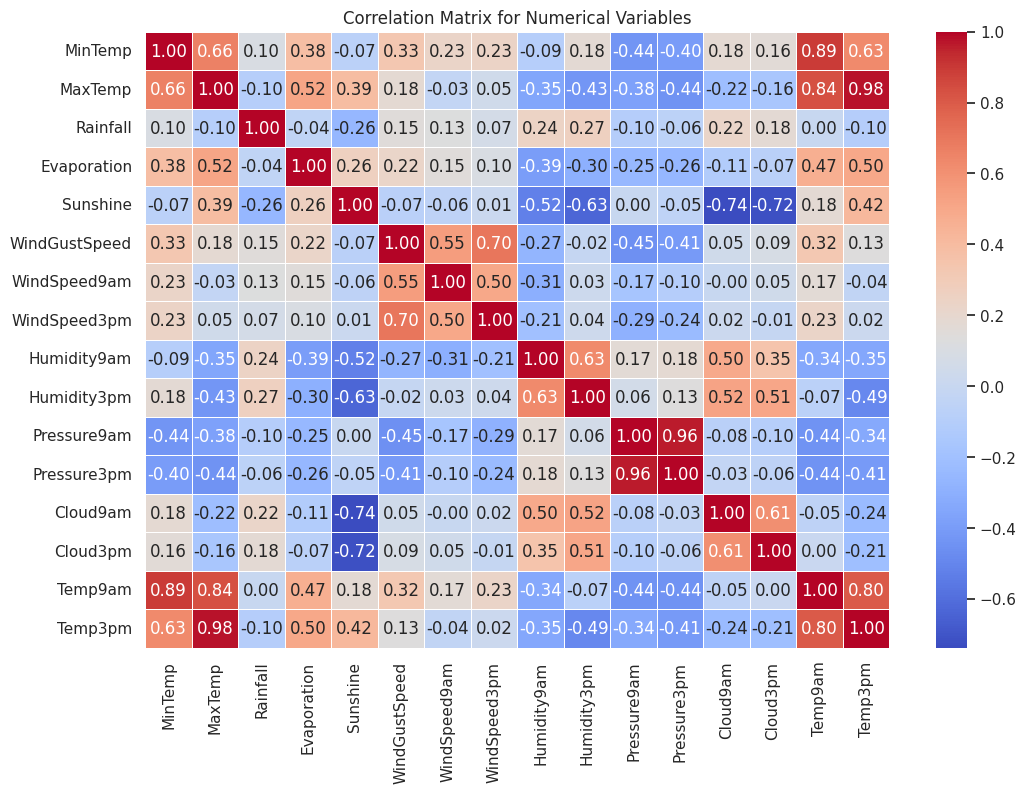

In [ ]:
numerical_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                     'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                     'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
                     'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

numerical_data = df[numerical_columns]

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Variables')

In [ ]:
df_non_null = df.dropna(subset=['RainTomorrow', 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'])

data = df_non_null[['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'RainTomorrow']]

data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})

correlation_matrix = data.corr()

print(correlation_matrix['RainTomorrow'])

Evaporation    -0.091942
Sunshine       -0.498885
Cloud9am        0.359371
Cloud3pm        0.415876
RainTomorrow    1.000000
Name: RainTomorrow, dtype: float64


<ipython-input-13-e373bc85998e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})


Text(0.5, 1.0, 'Missing Data Heatmap')

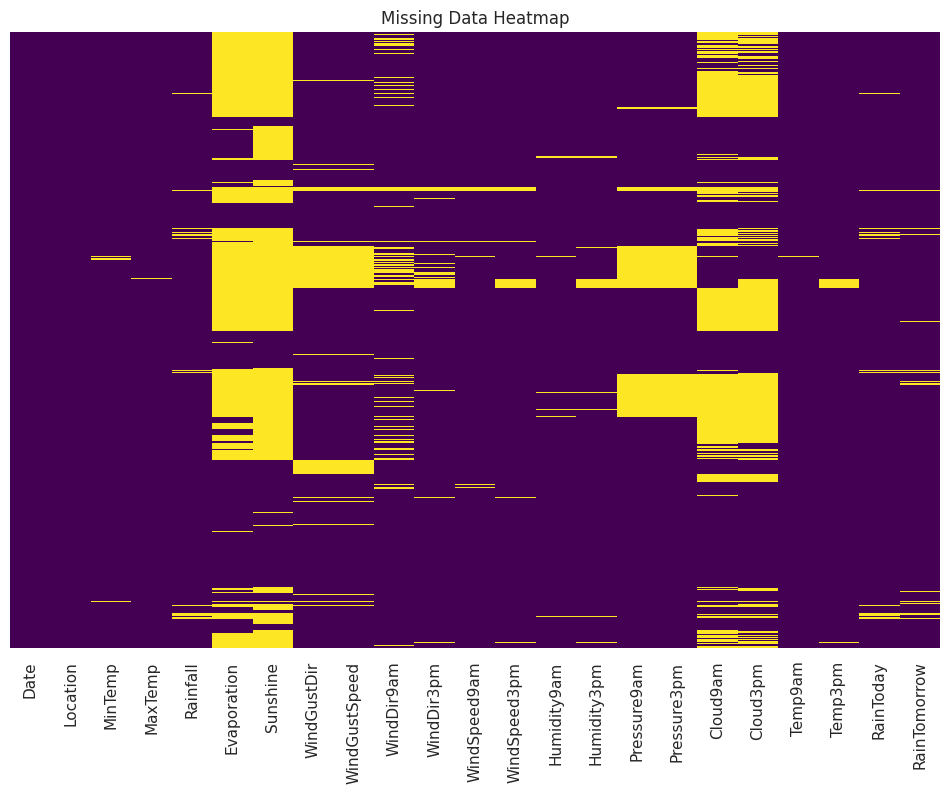

In [ ]:
missing_data = df.isnull().astype(int)

plt.figure(figsize=(12, 8))
sns.heatmap(missing_data, cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Data Heatmap')

So based on the correlation matrix between numerical variables, null heatmap and correlation between high percentage null columns and target variable, excluding nulls, we can make some analysis. Firstly, Evaporation-Sunshine and Cloud9am-Cloud3pm this duos have some pattern of missingness, also we can see that cloudiness on both hour periods are decently correlated with the sunshine, and lastly, sunshine has the most meaningful correlation with the target variable compared to the other columns, so I decide to keep the sunshine column and drop the other three, due to high absence of values and insignificance.

In [ ]:
df = df.drop(columns=['Evaporation', 'Cloud9am', 'Cloud3pm'])

Now lets impute all of our null values

I will use mean imputation for all numerical variables of which missing values count are less than 10,000

In [ ]:
columns_to_impute = [
    'MinTemp', 'MaxTemp', 'Rainfall', 'Temp3pm', 'Temp9am',
    'Humidity3pm', 'Humidity9am', 'WindSpeed3pm', 'WindSpeed9am'
]

imputer = SimpleImputer(strategy='mean')

df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

Lets use KNN imputation method for the remaining numerical variables

In [ ]:
columns_to_impute_knn = [
    'Sunshine', 'WindGustSpeed',
    'Pressure9am', 'Pressure3pm'
]

knn_imputer = KNNImputer(n_neighbors=5)

df[columns_to_impute_knn] = knn_imputer.fit_transform(df[columns_to_impute_knn])

Now do the mode imputation for the categorical variables (it is not the best method but since they don't have many null values bias won't be the case)

In [ ]:
categorical_columns = ['WindDir9am', 'WindDir3pm', 'WindGustDir', 'RainToday', 'RainTomorrow']

mode_imputer = SimpleImputer(strategy='most_frequent')

df[categorical_columns] = mode_imputer.fit_transform(df[categorical_columns])

Done! we got rid of all null values, no lets do the encoding part

Text(0.5, 1.0, 'Correlation Matrix for Numerical Variables')

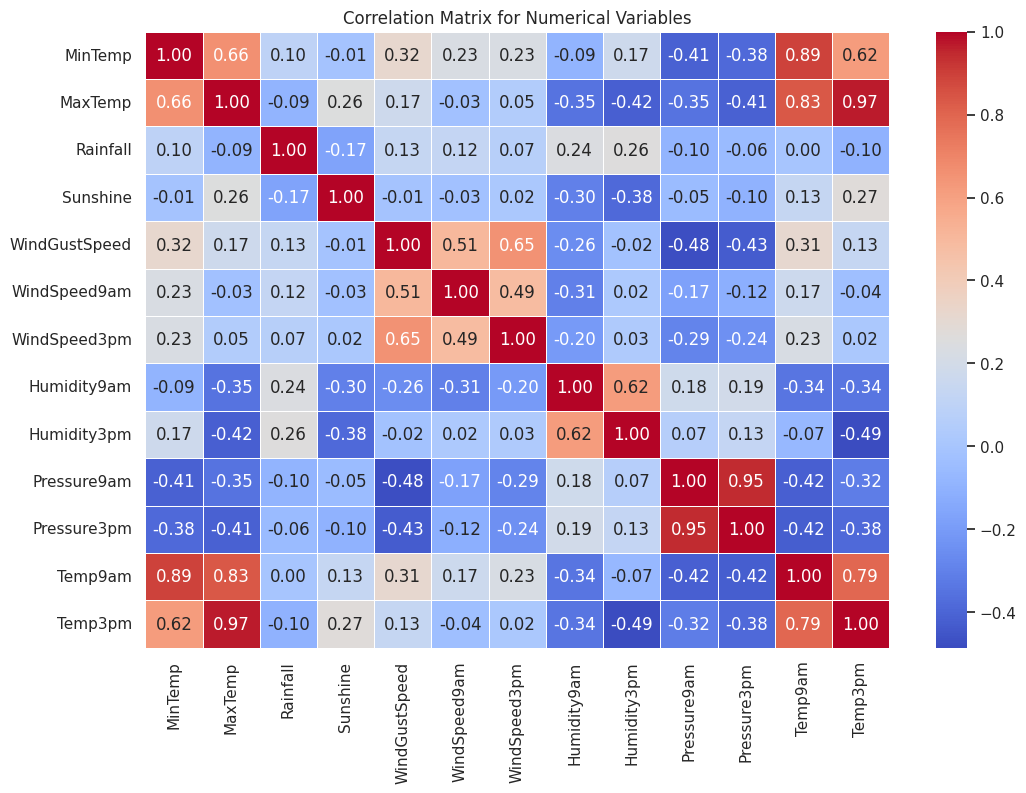

In [ ]:
numerical_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine',
                     'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                     'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
                     'Temp9am', 'Temp3pm']

numerical_data = df[numerical_columns]

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Variables')

By taking another look at our corr matrix its seem pretty normal. Then only high correlated things are Temps by times and Min and Max temperatures, which is quite logical. And also between Pressures of differente hours, which also is natural thing to happen.

In [ ]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    print(f"Distinct values in '{col}':")
    print(df[col].unique())
    print('-' * 50)

Distinct values in 'Date':
['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-11-28' '2008-11-29'
 '2008-11-30']
--------------------------------------------------
Distinct values in 'Location':
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong']
--------------------------------------------------
Distinct values in 'WindGustDir':
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']
--------------------------------------------------
Distinct values in 'WindDir9am':
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'SSW' 'N' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']
--------------------------------------------------
Distinct values in 'WindDir3pm':
['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']
--------------------------------------------------
Distinct values in 'RainToday':
['No' 'Yes']
----------

Lets first encode our Rain status and prediction variables with binary encoding

In [ ]:
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

So I thought about what kind of encoding would be the best fit for the location variable, I think the best option is to do target endoding in terms of Rain tomorrow. It will give us probabilities of rain for the next day which would make this columns much more useful for classification task

In [ ]:
location_mean = df.groupby('Location')['RainTomorrow'].mean()

df['Location'] = df['Location'].map(location_mean)

And lastly we got Wind direction columns left.

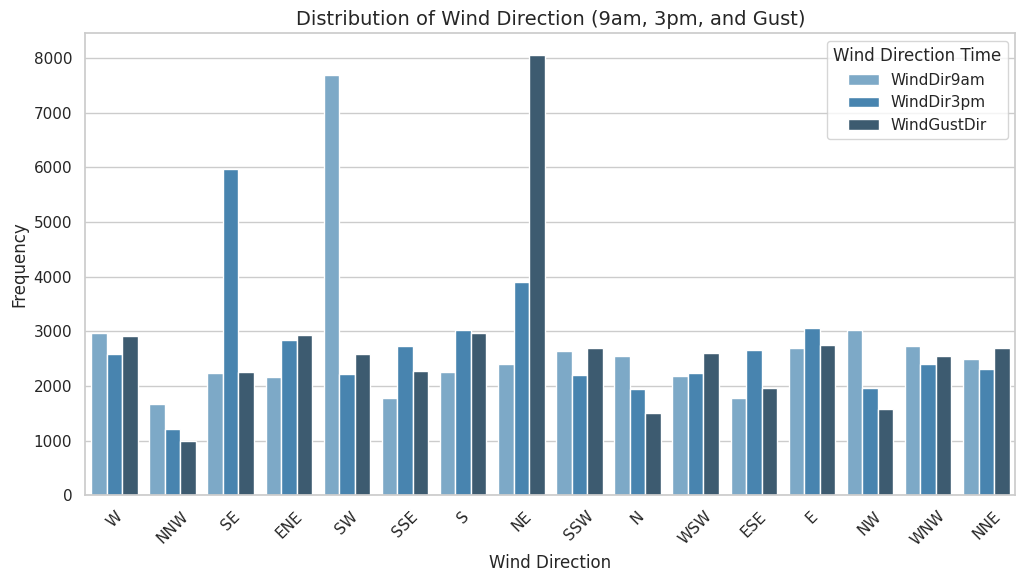

In [ ]:
df_melted = df[["WindDir9am", "WindDir3pm", "WindGustDir"]].melt(var_name='Wind Direction Time', value_name='Wind Direction')

plt.figure(figsize=(12, 6))
sns.countplot(x='Wind Direction', hue='Wind Direction Time', data=df_melted, palette='Blues_d')
plt.title('Distribution of Wind Direction (9am, 3pm, and Gust)', fontsize=14)
plt.xlabel('Wind Direction', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Wind Direction Time', loc='upper right')

There is no some particular pattern between these values unfortunately, which makes it harder to come up with the best encoding idea for it. I think the best fit shoud be the target encoding, let me explain why: So in theory the wind direction should be altering the cloud movement, and in differenct countries the different wind direction would have different rain outcome, and based on this logical theory I think we should base our encodre on the relationship between wind directions in locations and the approximate probability of rain.

In [ ]:
def target_encode(df, feature_cols, target_col):
    for col in feature_cols:
        encoding = df.groupby([col, 'Location'])[target_col].mean().reset_index()
        encoding = encoding.rename(columns={target_col: f'{col}_encoded'})

        df = df.merge(encoding, on=[col, 'Location'], how='left')

    return df

columns_to_encode = ['WindDir9am', 'WindDir3pm', 'WindGustDir']

df = target_encode(df, columns_to_encode, 'RainTomorrow')

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns

categorical_columns = [col for col in categorical_columns if col != 'Date']

df = df.drop(columns=categorical_columns)

In [ ]:
df.head().T

0           1           2           3  \
Date                 2008-12-01  2008-12-02  2008-12-03  2008-12-04   
Location                0.20349     0.20349     0.20349     0.20349   
MinTemp                    13.4         7.4        12.9         9.2   
MaxTemp                    22.9        25.1        25.7        28.0   
Rainfall                    0.6         0.0         0.0         0.0   
Sunshine                   10.0        8.52         5.5         7.1   
WindGustSpeed              44.0        44.0        46.0        24.0   
WindSpeed9am               20.0         4.0        19.0        11.0   
WindSpeed3pm               24.0        22.0        26.0         9.0   
Humidity9am                71.0        44.0        38.0        45.0   
Humidity3pm                22.0        25.0        30.0        16.0   
Pressure9am              1007.7      1010.6      1007.6      1017.6   
Pressure3pm              1007.1      1007.8      1008.7      1012.8   
Temp9am                    16.9        17.2        21.0        18.1   
Temp3pm                    21.8        24.3        23.2        26.5   
RainToday                     0           0           0           0   
RainTomorrow                  0           0           0           0   
WindDir9am_encoded     0.099476    0.531646    0.099476    0.160093   
WindDir3pm_encoded     0.217009    0.104839    0.104839    0.236641   
WindGustDir_encoded    0.178218    0.226667    0.120172    0.290323   

                              4  
Date                 2008-12-05  
Location                0.20349  
MinTemp                    17.5  
MaxTemp                    32.3  
Rainfall                    1.0  
Sunshine                   6.98  
WindGustSpeed              41.0  
WindSpeed9am                7.0  
WindSpeed3pm               20.0  
Humidity9am                82.0  
Humidity3pm                33.0  
Pressure9am              1010.8  
Pressure3pm              1006.0  
Temp9am                    17.8  
Temp3pm                    29.7  
RainToday                     0  
RainTomorrow                  0  
WindDir9am_encoded     0.283133  
WindDir3pm_encoded         0.27  
WindGustDir_encoded    0.178218

# **Explanatory Data Analysis**

## **Univariate Analysis**

In [ ]:
df.describe().T

count         mean        std         min          25%  \
Location             43258.0     0.220121   0.052184    0.128324     0.186294   
MinTemp              43258.0    13.137604   5.777702   -4.800000     8.900000   
MaxTemp              43258.0    23.854027   6.009067    6.300000    19.400000   
Rainfall             43258.0     2.684602   9.247229    0.000000     0.000000   
Sunshine             43258.0     7.396385   2.735723    0.000000     5.980000   
WindGustSpeed        43258.0    38.651386  13.101241    7.000000    30.000000   
WindSpeed9am         43258.0    13.022640   8.974106    0.000000     6.000000   
WindSpeed3pm         43258.0    17.769517   9.198037    0.000000    11.000000   
Humidity9am          43258.0    69.981624  17.343693    3.000000    58.000000   
Humidity3pm          43258.0    52.151418  20.200130    1.000000    37.000000   
Pressure9am          43258.0  1018.398082   6.362053  980.500000  1014.500000   
Pressure3pm          43258.0  1015.871079   6.243800  979.000000  1012.100000   
Temp9am              43258.0    17.681289   5.378707    0.000000    13.900000   
Temp3pm              43258.0    22.385442   5.792977    6.000000    18.200000   
RainToday            43258.0     0.220121   0.414333    0.000000     0.000000   
RainTomorrow         43258.0     0.220121   0.414333    0.000000     0.000000   
WindDir9am_encoded   43258.0     0.220121   0.099345    0.000000     0.156589   
WindDir3pm_encoded   43258.0     0.220121   0.113176    0.000000     0.142145   
WindGustDir_encoded  43258.0     0.220121   0.108817    0.023810     0.139665   

                             50%          75%          max  
Location                0.223572     0.258672     0.305417  
MinTemp                13.600000    17.800000    29.700000  
MaxTemp                23.400000    27.500000    47.300000  
Rainfall                0.000000     1.000000   371.000000  
Sunshine                7.583688     9.200000    14.100000  
WindGustSpeed          38.649162    46.000000   135.000000  
WindSpeed9am           13.000000    19.000000   130.000000  
WindSpeed3pm           17.000000    24.000000    83.000000  
Humidity9am            70.000000    83.000000   100.000000  
Humidity3pm            52.151418    66.000000   100.000000  
Pressure9am          1018.278820  1022.400000  1039.900000  
Pressure3pm          1015.725453  1019.900000  1037.000000  
Temp9am                18.100000    21.600000    37.700000  
Temp3pm                22.000000    25.800000    46.700000  
RainToday               0.000000     0.000000     1.000000  
RainTomorrow            0.000000     0.000000     1.000000  
WindDir9am_encoded      0.186047     0.280000     1.000000  
WindDir3pm_encoded      0.200000     0.270000     1.000000  
WindGustDir_encoded     0.188679     0.278689     0.666667

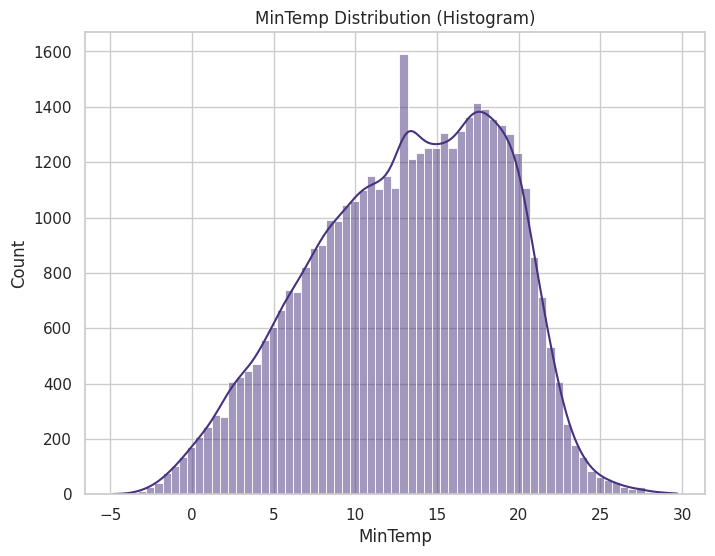

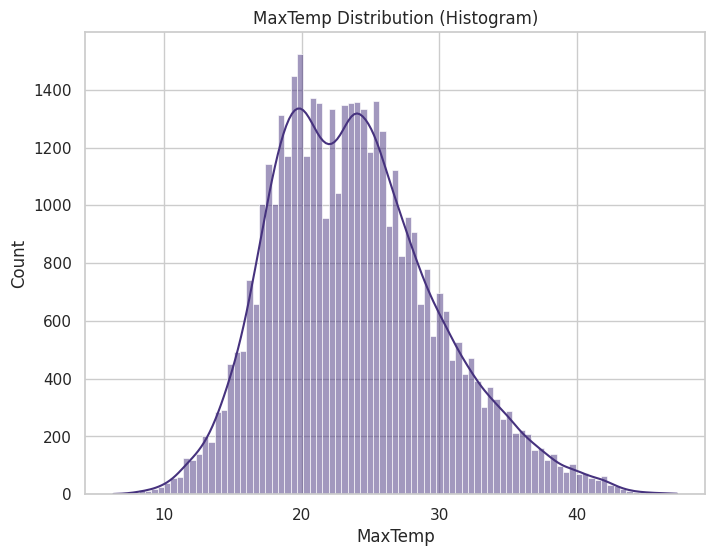

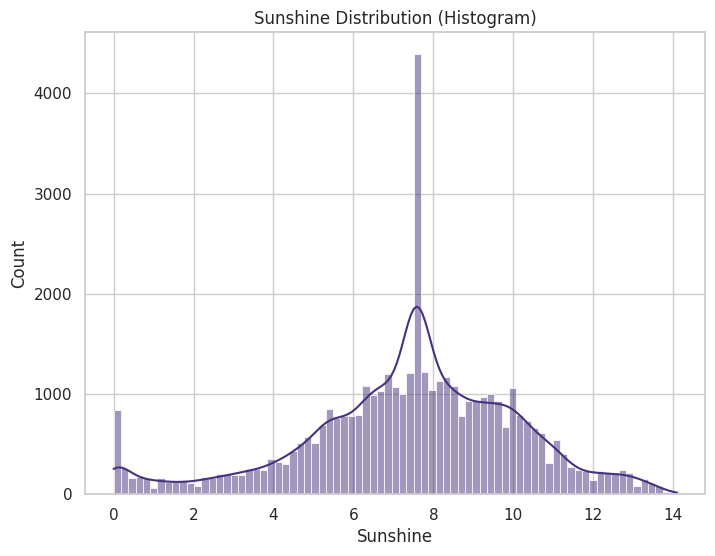

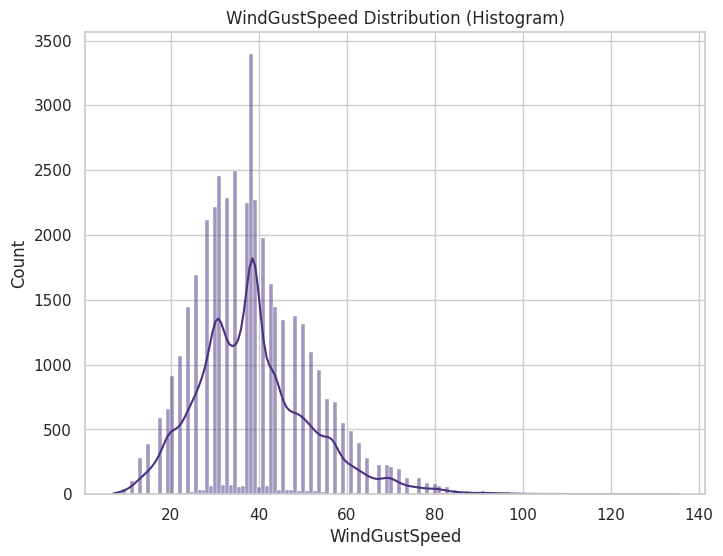

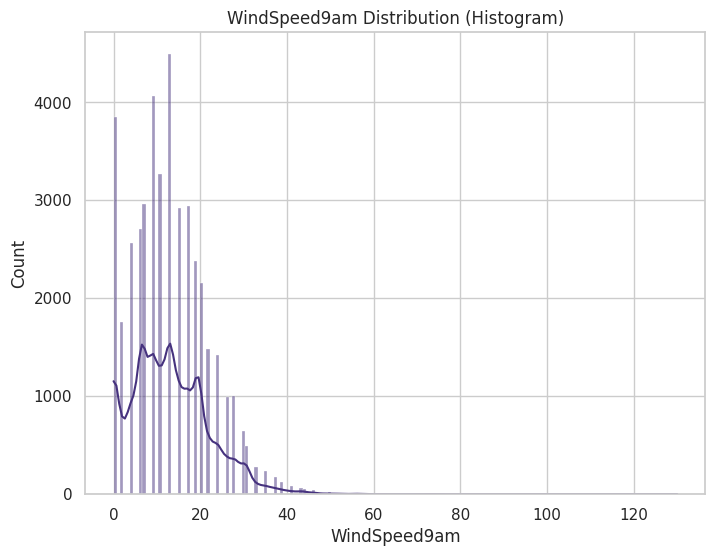

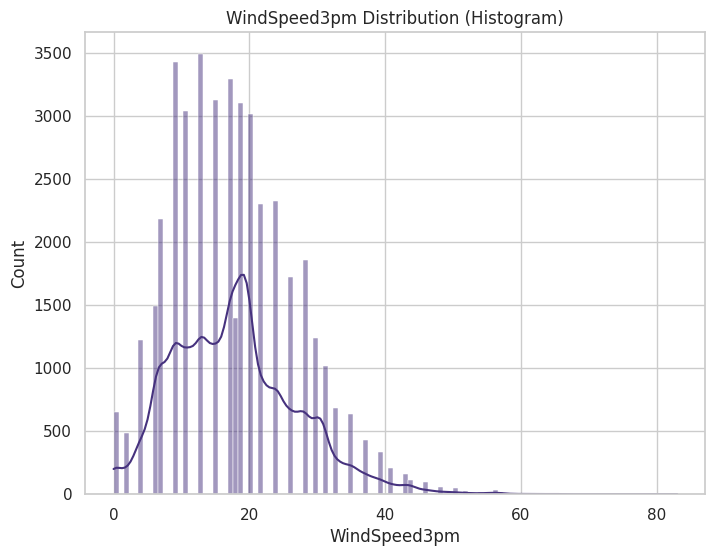

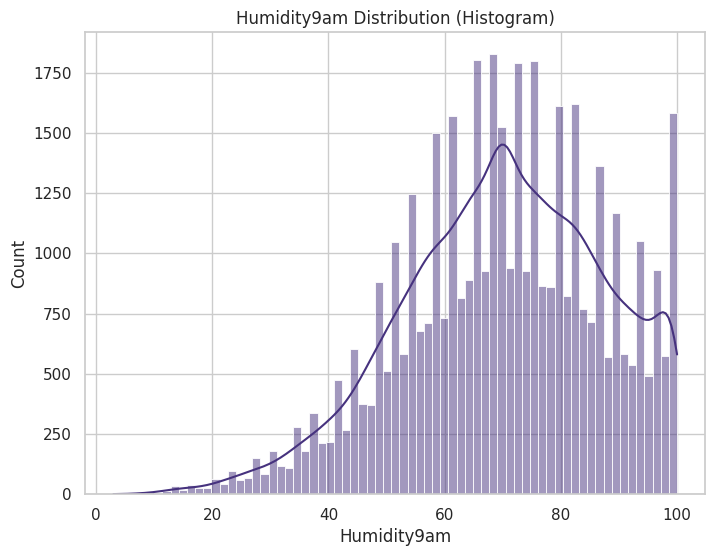

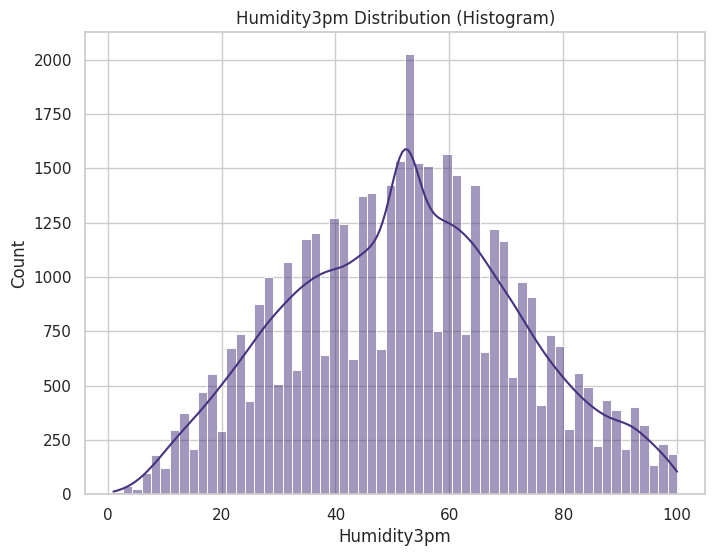

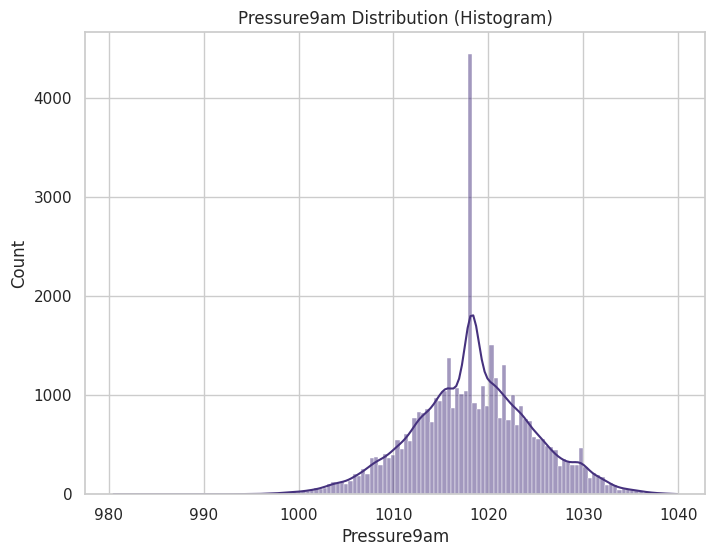

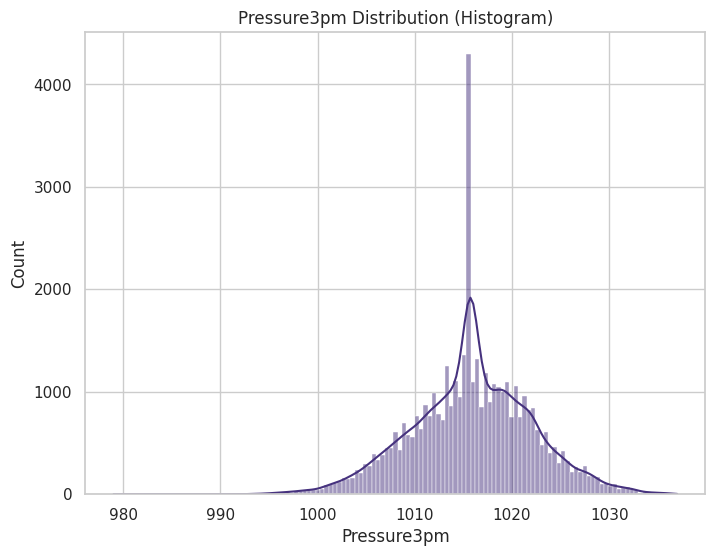

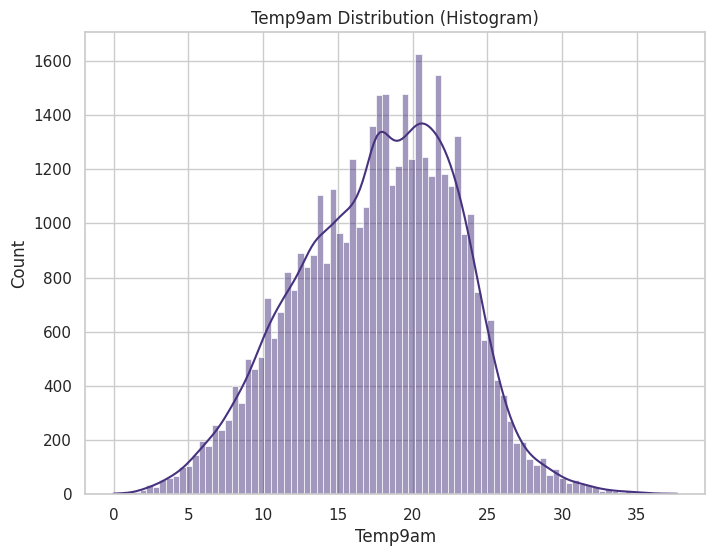

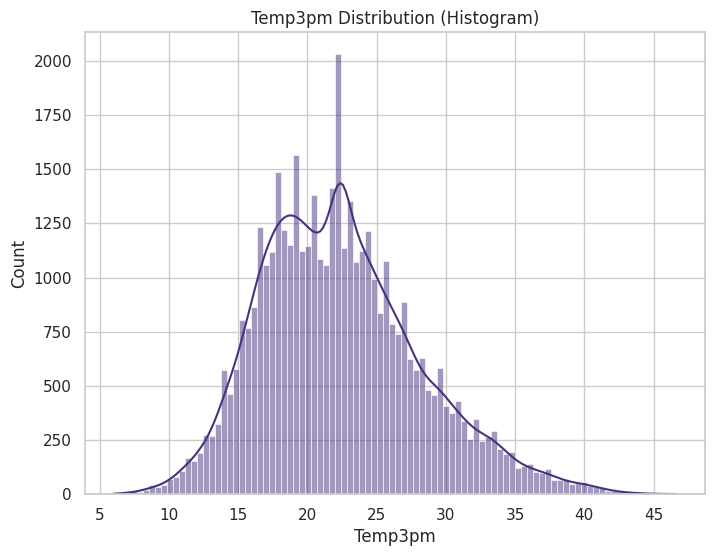

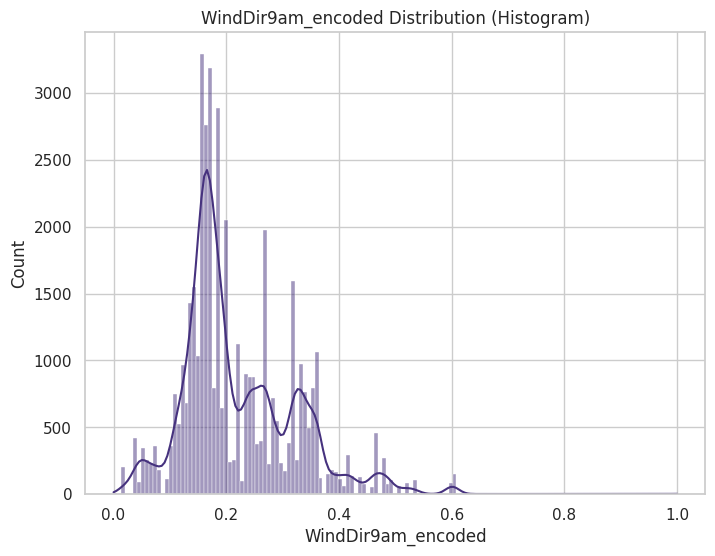

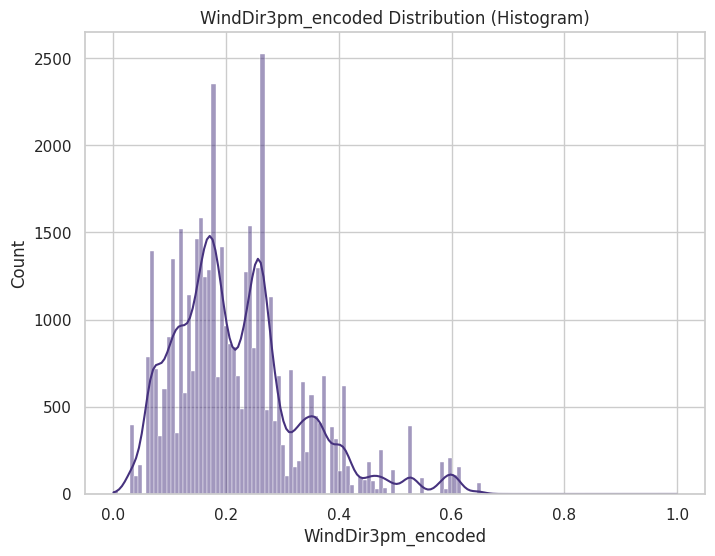

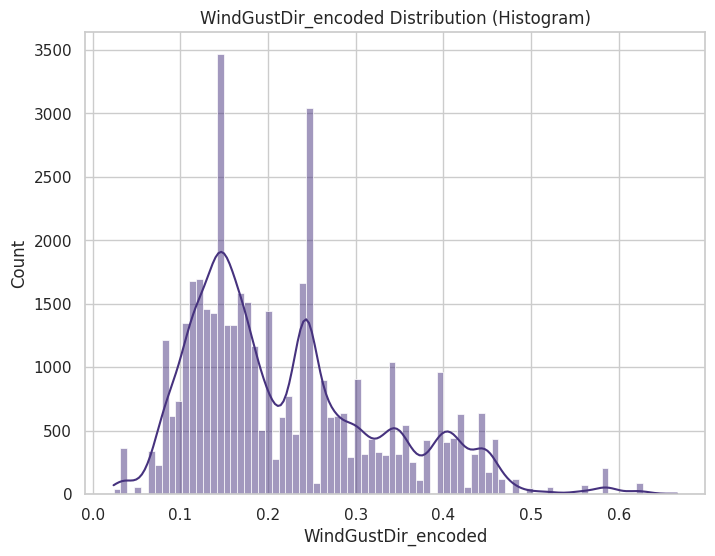

In [ ]:
numerical_columns = ['MinTemp', 'MaxTemp', 'Sunshine', 'WindGustSpeed',
                     'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
                     'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'WindDir9am_encoded',
                     'WindDir3pm_encoded', 'WindGustDir_encoded']

for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution (Histogram)')

So according to our distribution plots, we can say that most of them have normal distribution with different kurtosis and skew levels, some of them are negatively skewed and some of them vice versa. One more interesting thing is that on some of the distributions seem odd, because some particular values have higher distribution than others and the bar plots are jumping up and down because of that difference, this is the case for pretty much all of the variables, I guess because for example some locations have the same fixed temperatures and pressure levels and some particular values are less than the others, its more like nature thing I think. Also some of the distributions have like 1 particular value much higher than the others, that could also be the fault of the fixed location-based temperature, which occurs more times than the others.

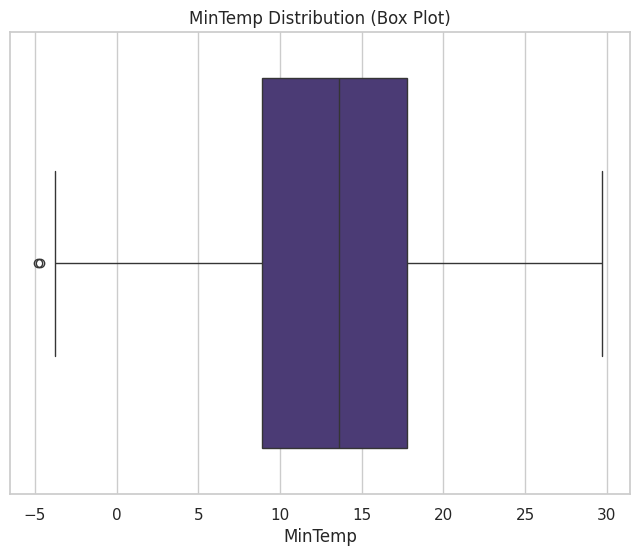

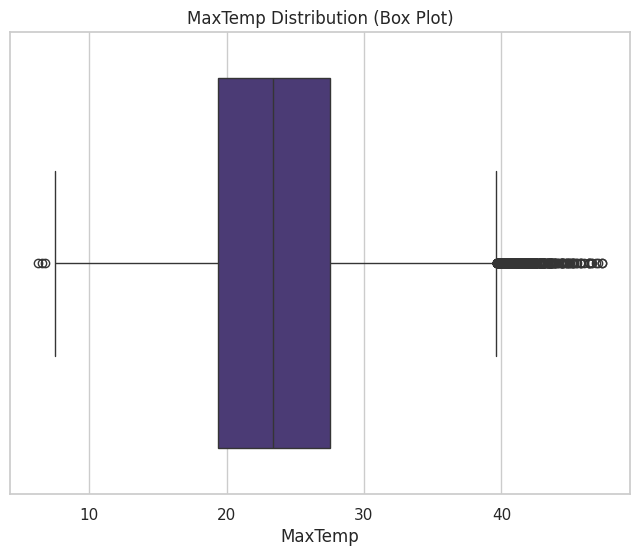

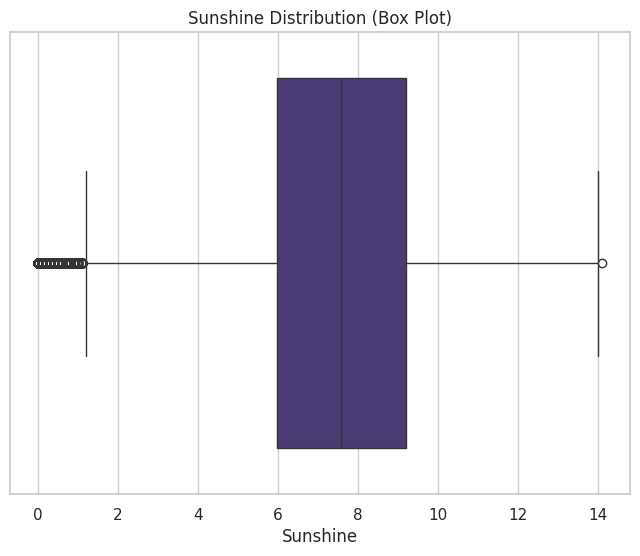

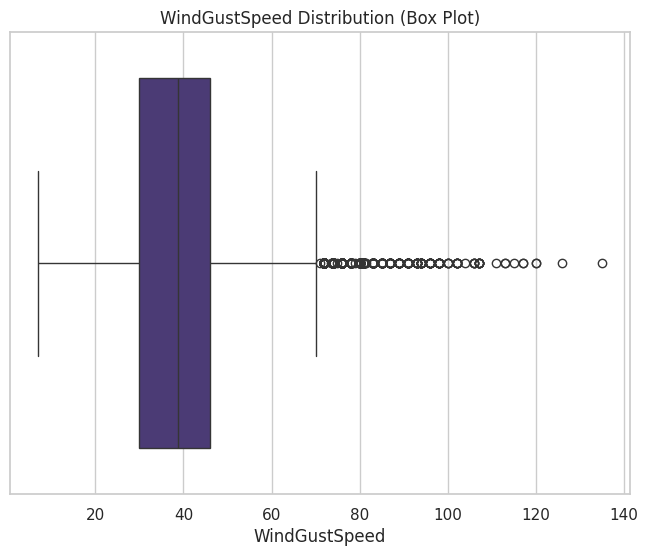

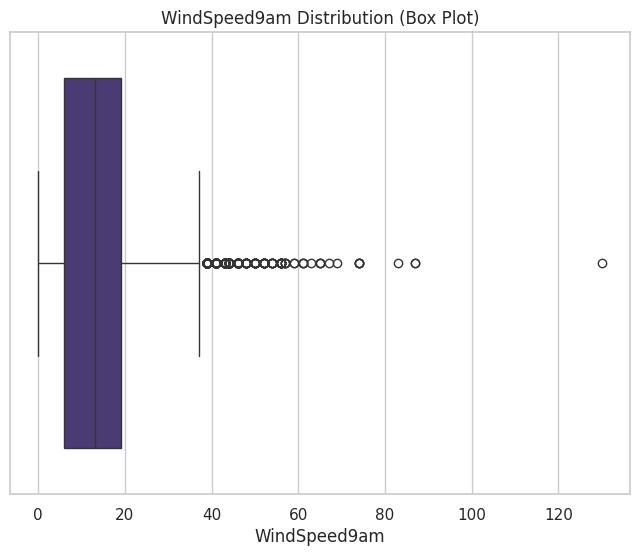

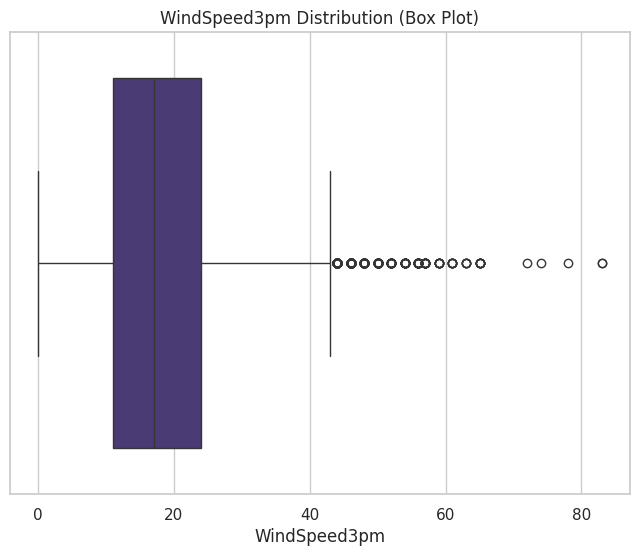

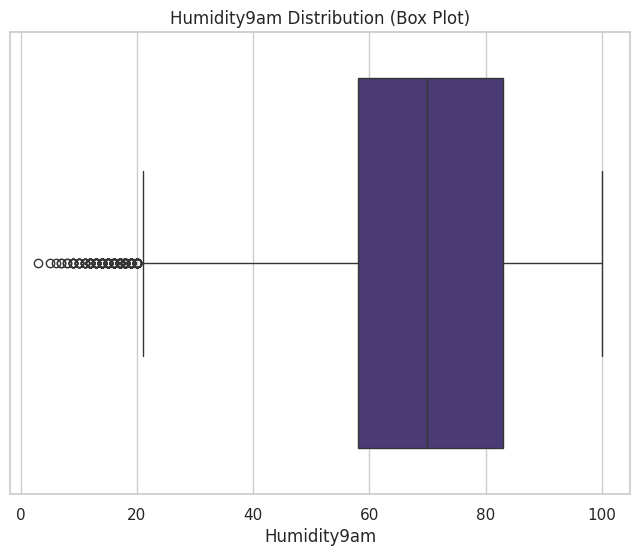

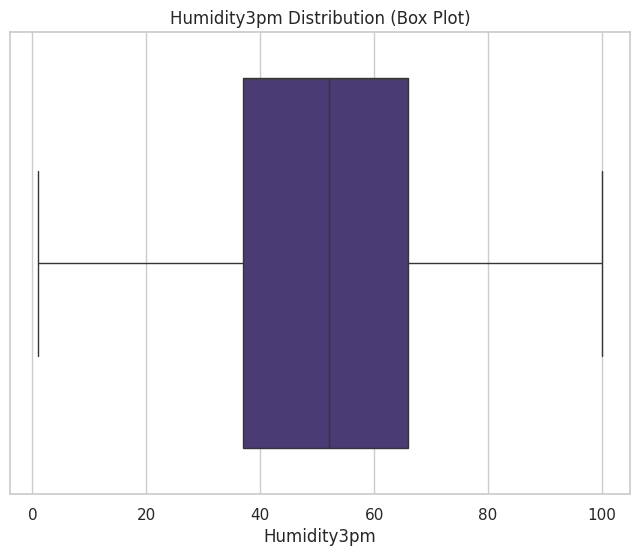

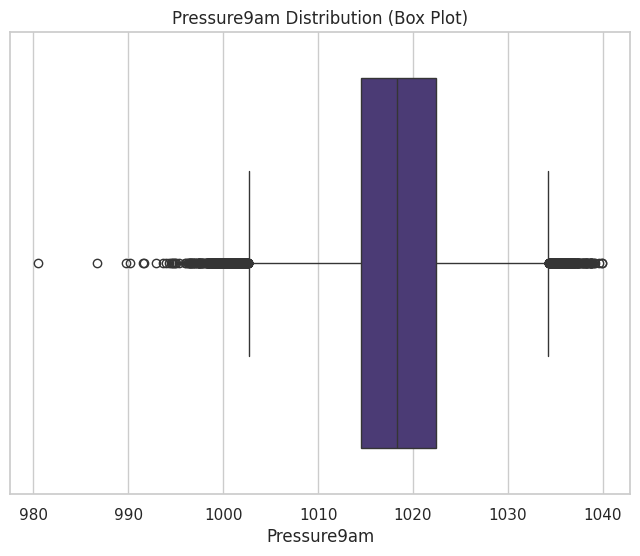

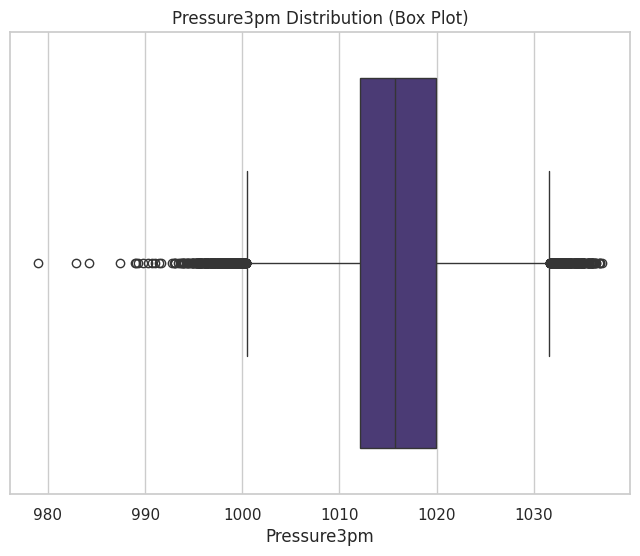

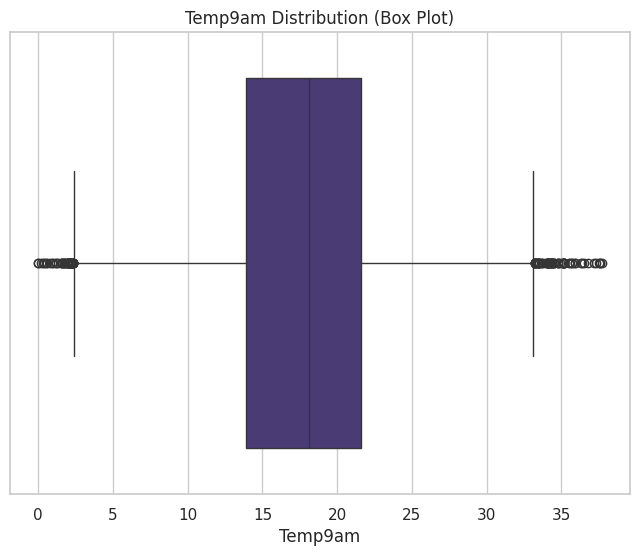

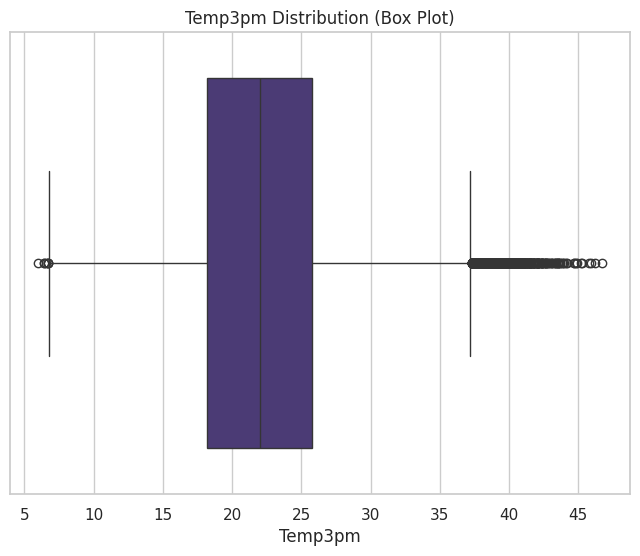

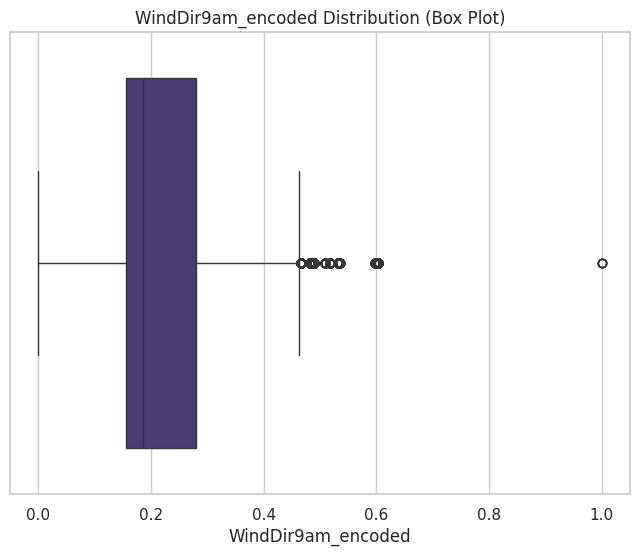

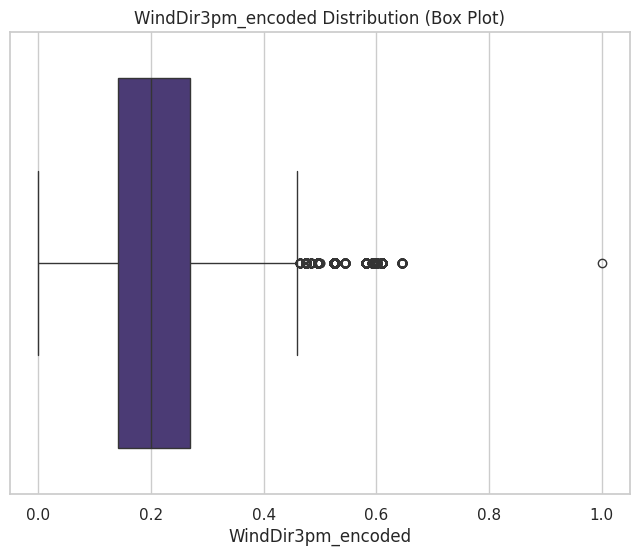

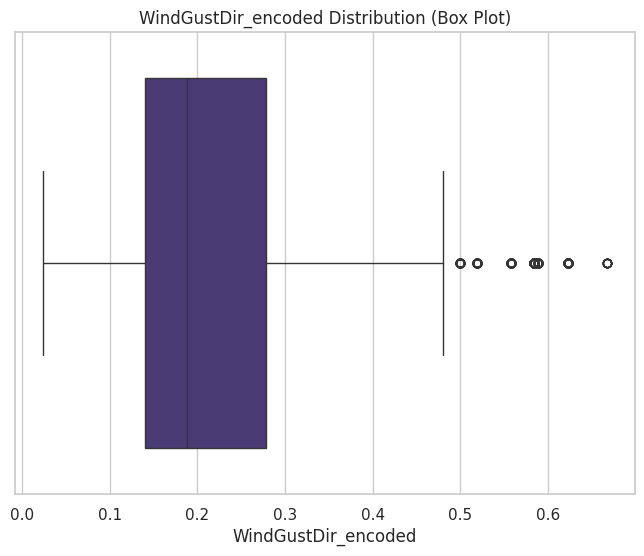

In [ ]:
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'{col} Distribution (Box Plot)')

Okay here, if we take close look to all the boxplots it is obvious that there are no significant outliers occured, except the Wind direction variables, the ones with the hour indicators have both the outlier of 1, which based on our encoding method means that some locations had the constant wind direction for the whole time period, which I mean could be the case and I dont think it should be considered as an outlier. Other than this, everything seem pretty normal

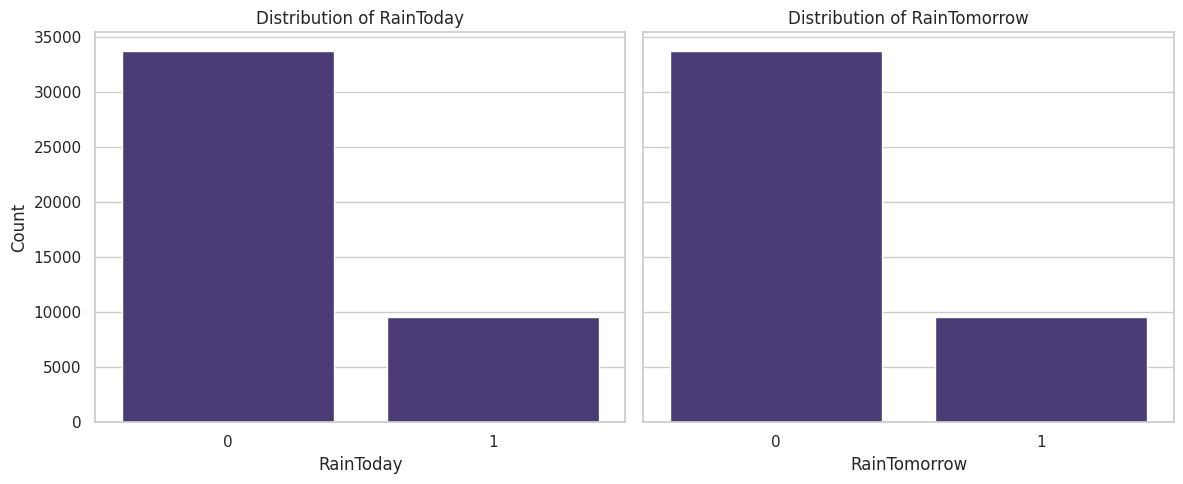

In [ ]:
columns = ['RainToday', 'RainTomorrow']

fig, axes = plt.subplots(1, len(columns), figsize=(12, 5), sharey=True)

for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].set_xticks([0, 1])

plt.tight_layout()

In both cases we have inbalanced values, but having inbalanced target variable is what concernes us the most and I will address this problem later, for our sampling

## **Multivariate Analysis**

Text(0.5, 1.0, 'Spearman Correlation with RainTomorrow')

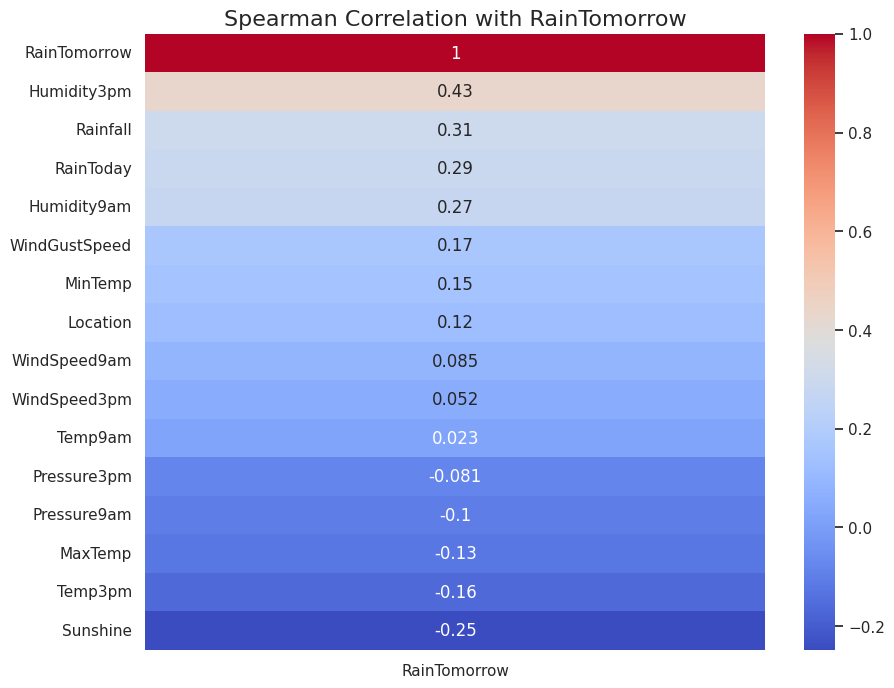

In [ ]:
numerical_columns = ['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine',
                     'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                     'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
                     'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']

numerical_data = df[numerical_columns]

corr_spearman = numerical_data.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_spearman[['RainTomorrow']].sort_values(by='RainTomorrow', ascending=False),
            annot=True, cmap='coolwarm')
plt.title('Spearman Correlation with RainTomorrow', fontsize=16)

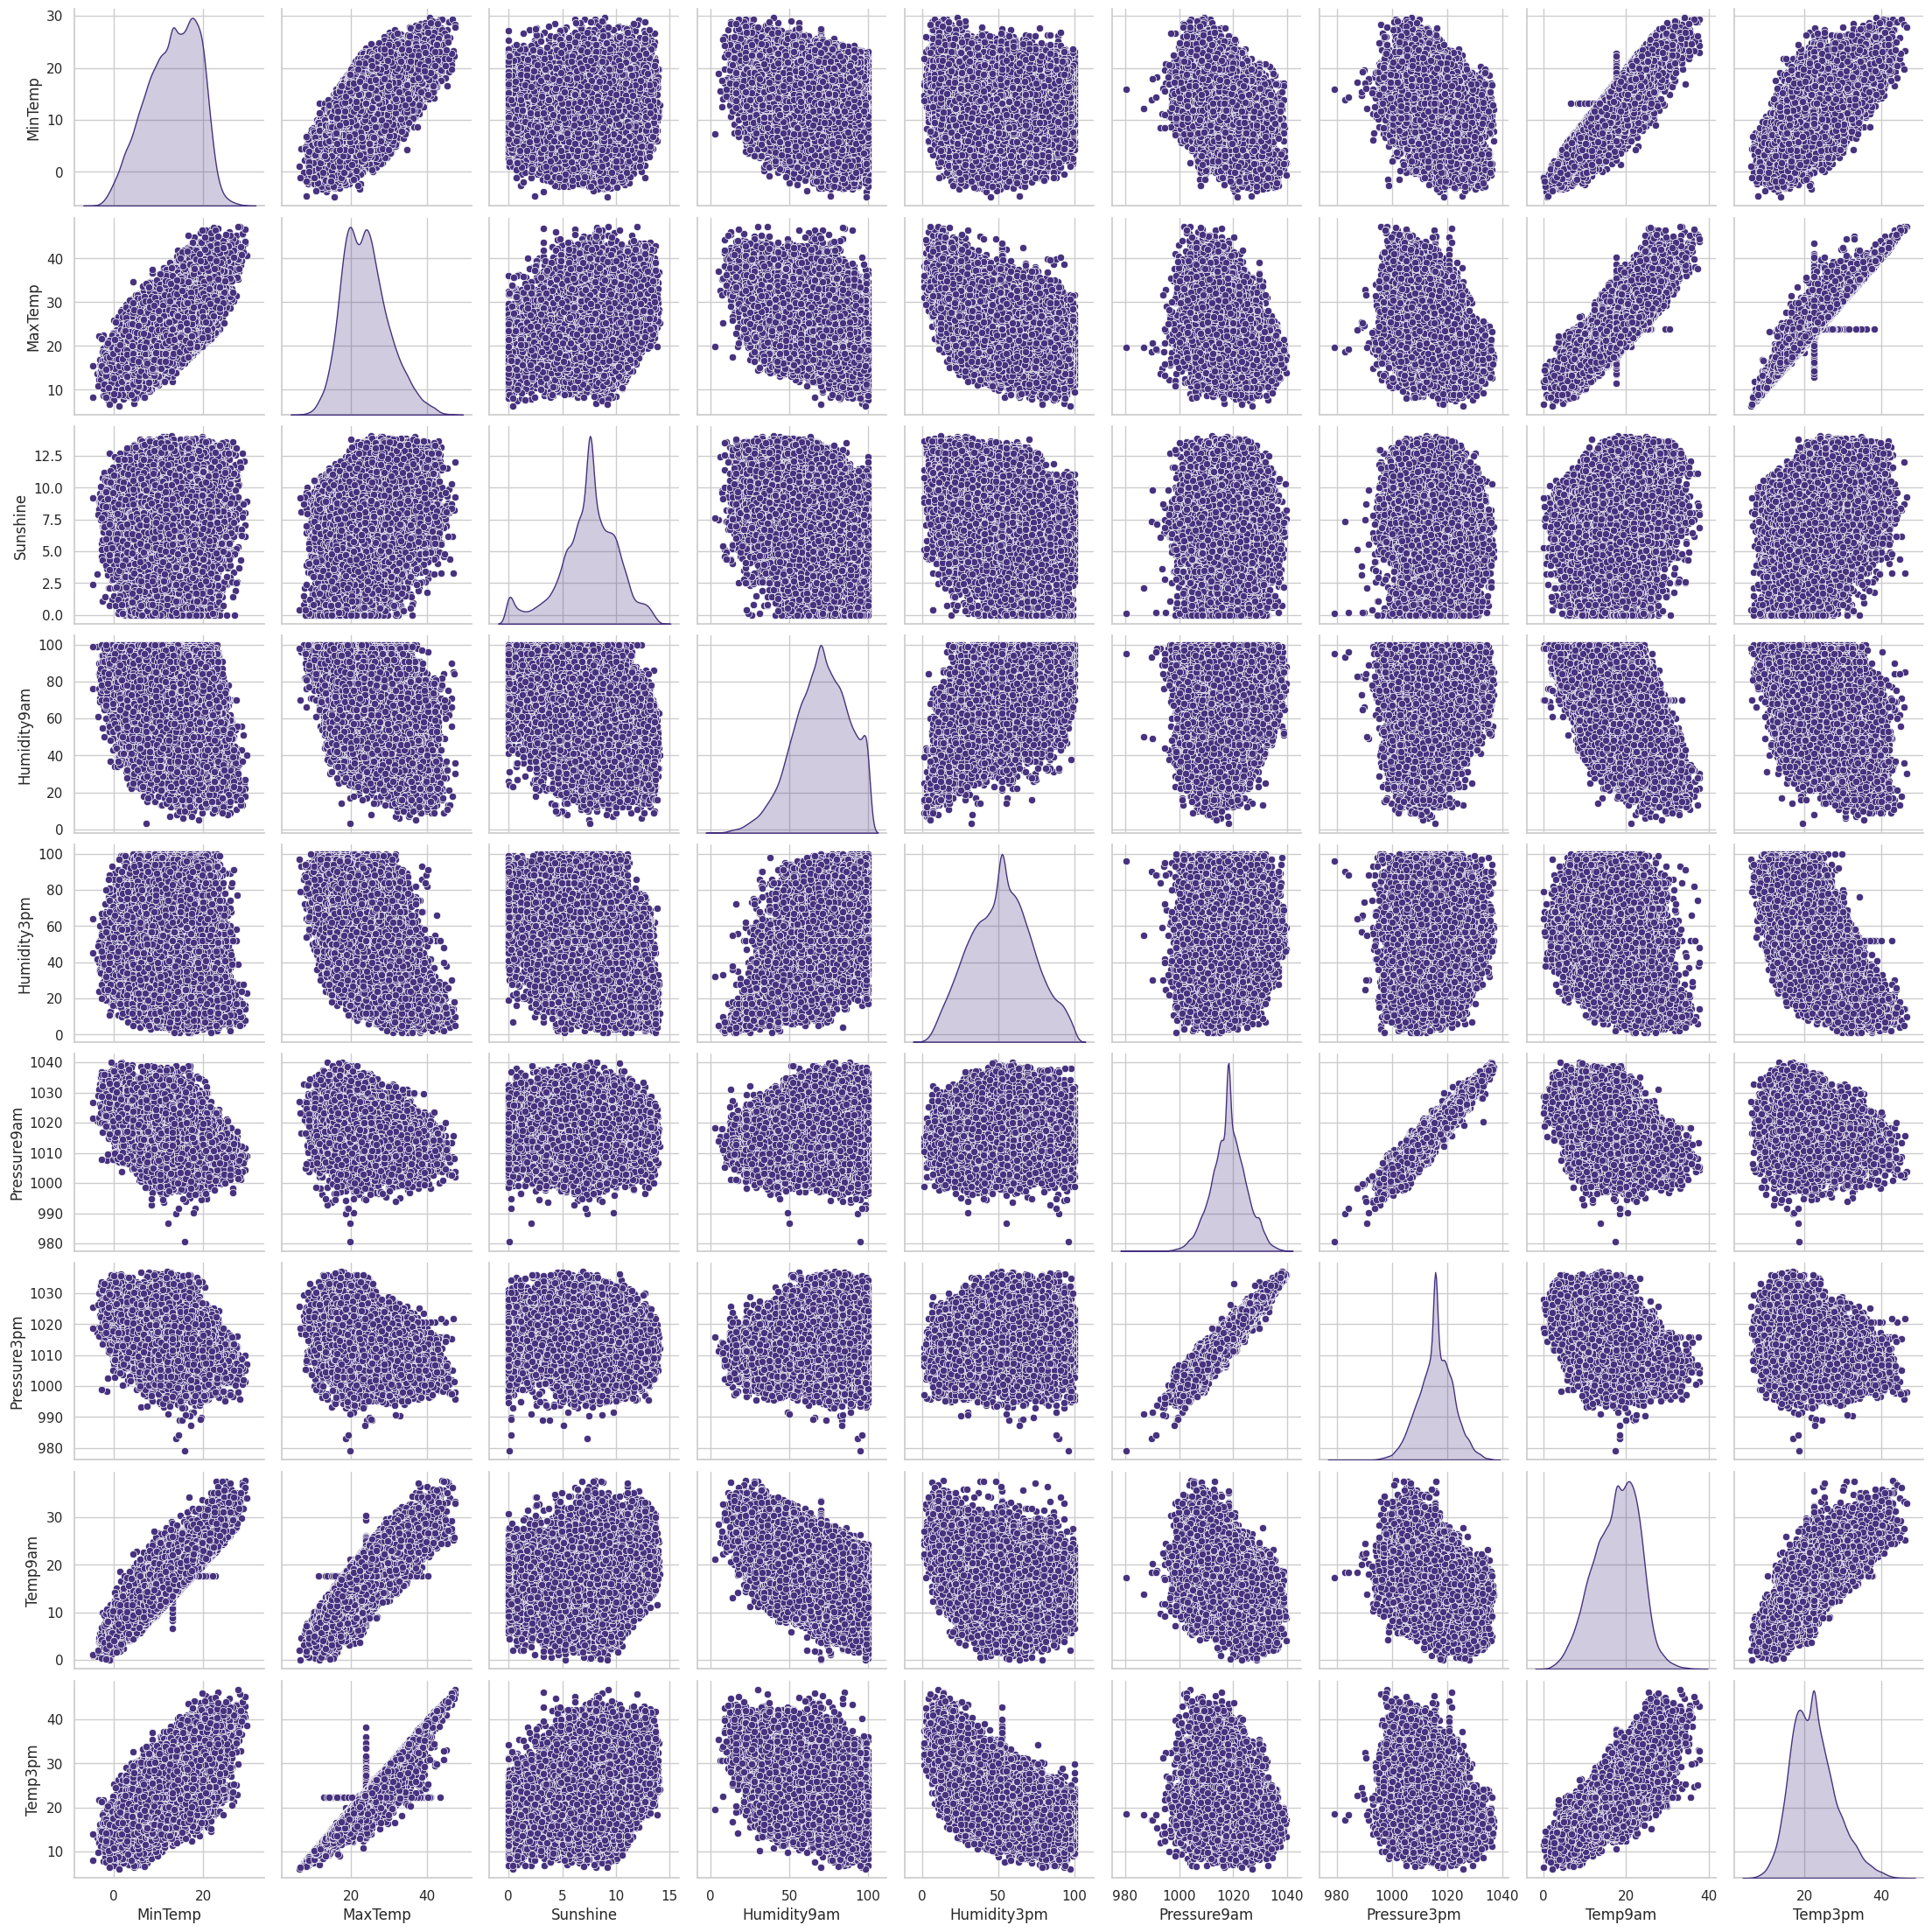

In [ ]:
numerical_columns = ['MinTemp', 'MaxTemp','Sunshine',
                     'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
                     'Temp9am', 'Temp3pm']

sns.pairplot(df[numerical_columns], diag_kind='kde')

So here we can see all the numerical feature to feature correlations that we already discussed, but now its visualized. We can see that pressure on different time periodes are strongly correlated as well as MinMax Temperatures with the hours specific ones. Both of this correlations are pretty logical and explainable, other than these, there are no significant correlation that we should emphasize

# **Cross Validation and Scaling**

Lets first split our date with TimeSeriesSplit and then we do the scaling to make the final form of our train and test datasets to start model training

In [ ]:
df = df.sort_values(by='Date')

X = df.drop(columns=["RainTomorrow", "Date"])
y = df["RainTomorrow"]

tscv = TimeSeriesSplit(n_splits=5)

splits = []
for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    splits.append((X_train, X_test, y_train, y_test))

print("First Training Split Shape:", X_train.shape)
print("First Test Split Shape:", X_test.shape)

First Training Split Shape: (36049, 18)
First Test Split Shape: (7209, 18)


In [ ]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

# **Model Building and Comparison**

Since we have our data imputed, encoded, split and scaled, its time to train different models on them and see which one would show the best results.

I will divide this section in multiple parts. In every single of them I will firstly train both, under-sampled and over-sampled datas on every each classification model and find out the better performer. After I got the strategy right, I will fine tune the one that had better metrics and enhance models performance with fine tuning. At the end, I will compare all the fine tuned model metrics and discuss their differences

## **Logistic Regression**


In [ ]:
def logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return classification_report(y_test, y_pred)

def under_sampling(X_train, y_train):
    rus = RandomUnderSampler(sampling_strategy='auto')
    X_res, y_res = rus.fit_resample(X_train, y_train)
    return logistic_regression(X_res, y_res, X_test_scaled, y_test)

def smote_sampling(X_train, y_train):
    smote = SMOTE(sampling_strategy='auto')
    X_res, y_res = smote.fit_resample(X_train, y_train)
    return logistic_regression(X_res, y_res, X_test_scaled, y_test)

under_sampling_result = under_sampling(X_train_scaled, y_train)
print("Under-sampling Logistic Regression Results:\n", under_sampling_result)

smote_result = smote_sampling(X_train_scaled, y_train)
print("SMOTE Logistic Regression Results:\n", smote_result)

Under-sampling Logistic Regression Results:
               precision    recall  f1-score   support

           0       0.91      0.80      0.85      5629
           1       0.50      0.72      0.59      1580

    accuracy                           0.78      7209
   macro avg       0.70      0.76      0.72      7209
weighted avg       0.82      0.78      0.79      7209

SMOTE Logistic Regression Results:
               precision    recall  f1-score   support

           0       0.91      0.80      0.85      5629
           1       0.50      0.71      0.58      1580

    accuracy                           0.78      7209
   macro avg       0.70      0.75      0.72      7209
weighted avg       0.82      0.78      0.79      7209



Both under-sampling and SMOTE models produced similar results. Both achieved an accuracy of 0.79, with precision of 0.52 and recall of 0.76 for the minority class (Class 1). For the majority class (Class 0), both models had high precision of 0.92 and recall of 0.80. There was no significant performance difference between the two, though SMOTE might be slightly preferred due to minor differences in results.

Time to fine tune the over-sampled model

In [ ]:
smote = SMOTE(random_state=42)
logreg = LogisticRegression(max_iter=1000)

X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'saga'],
}

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_res, y_train_res)

print("Best parameters found: ", grid_search.best_params_)

best_logreg = grid_search.best_estimator_

y_pred = best_logreg.predict(X_test_scaled)

print("Fine-tuned SMOTE Logistic Regression Results:\n", classification_report(y_test, y_pred))

Best parameters found:  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Fine-tuned SMOTE Logistic Regression Results:
               precision    recall  f1-score   support

           0       0.91      0.80      0.85      5629
           1       0.50      0.71      0.59      1580

    accuracy                           0.78      7209
   macro avg       0.70      0.76      0.72      7209
weighted avg       0.82      0.78      0.79      7209



Text(66.25, 0.5, 'Actual')

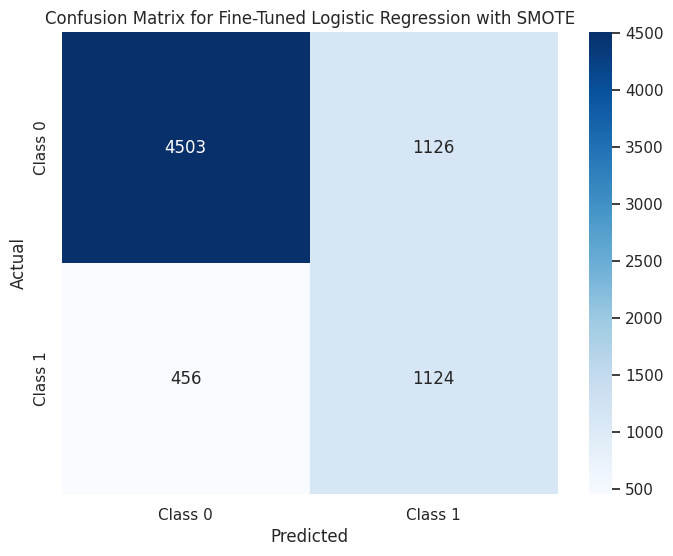

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for Fine-Tuned Logistic Regression with SMOTE')
plt.xlabel('Predicted')
plt.ylabel('Actual')

The fine-tuning of the logistic regression model led to a small increase in precision for the minority class (Class 1), but the impact on recall, F1-score, and overall accuracy was minimal. The model still performs well with decent recall for class 1, but there wasn't a significant improvement in key metrics after hyperparameter tuning. Therefore, while fine-tuning did improve the precision slightly, the model might not benefit much from further changes at this stage.

Top Feature Importances:
                Feature  Coefficient  Abs_Coefficient
11         Pressure3pm    -7.089602         7.089602
5        WindGustSpeed     5.953238         5.953238
9          Humidity3pm     5.876045         5.876045
10         Pressure9am     5.164633         5.164633
16  WindDir3pm_encoded     2.980526         2.980526


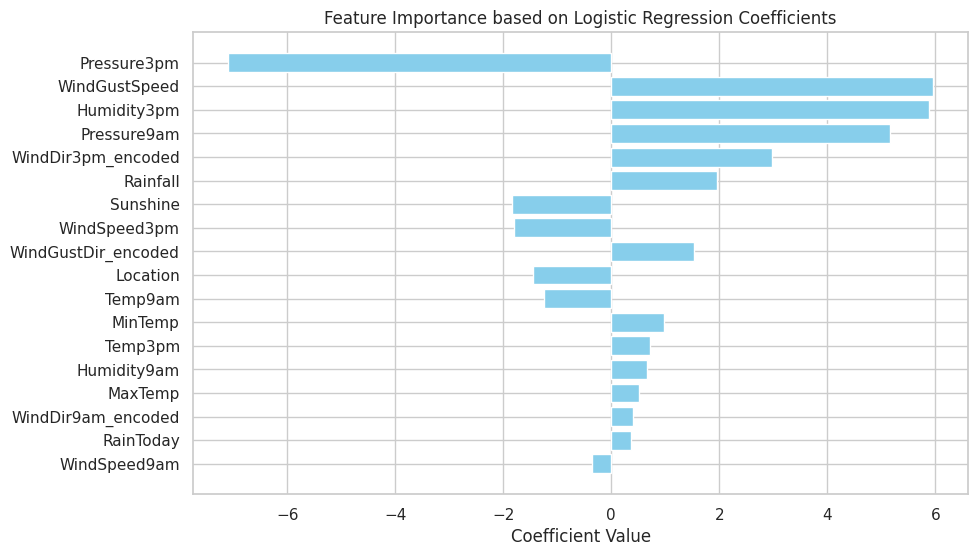

In [ ]:
coefficients = best_logreg.coef_[0]

features = [
    'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine',
    'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
    'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm',
    'RainToday', 'WindDir9am_encoded', 'WindDir3pm_encoded', 'WindGustDir_encoded'
]

feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].apply(np.abs)

feature_importance_sorted = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_sorted['Feature'], feature_importance_sorted['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance based on Logistic Regression Coefficients')
plt.gca().invert_yaxis()

print("Top Feature Importances:\n", feature_importance_sorted.head())

This graph illustrates the feature importance of various predictors in a logistic regression model, based on their coefficients. The most influential features are Pressure3pm and Pressure9am, both with strong positive coefficients, indicating that they play a significant role in the model's predictions. Other features, such as WindGustSpeed and Humidity3pm, also have notable positive contributions, though their impact is less pronounced compared to the pressure features. Features like WindDir3pm_encoded and Rainfall show moderate positive effects on the model's outcomes.

On the negative side, features such as Humidity9am, RainToday, and Temp9am exhibit small negative coefficients, indicating a slight opposing influence on the predictions. Many features, including Sunshine, Location, and MaxTemp, have coefficients near zero, suggesting they have minimal impact on the model's decision-making process.

Optimal Threshold: 0.606434905132489
Classification Report with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      5629
           1       0.58      0.63      0.61      1580

    accuracy                           0.82      7209
   macro avg       0.74      0.75      0.74      7209
weighted avg       0.83      0.82      0.82      7209



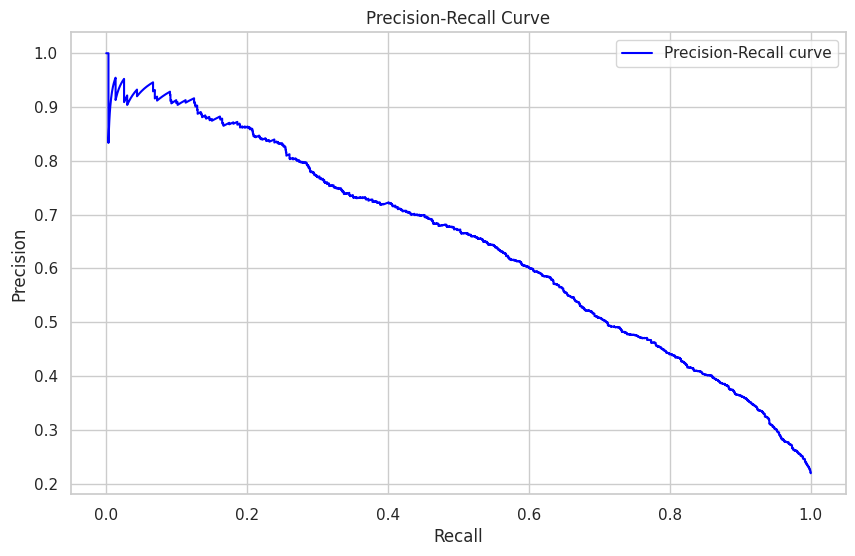

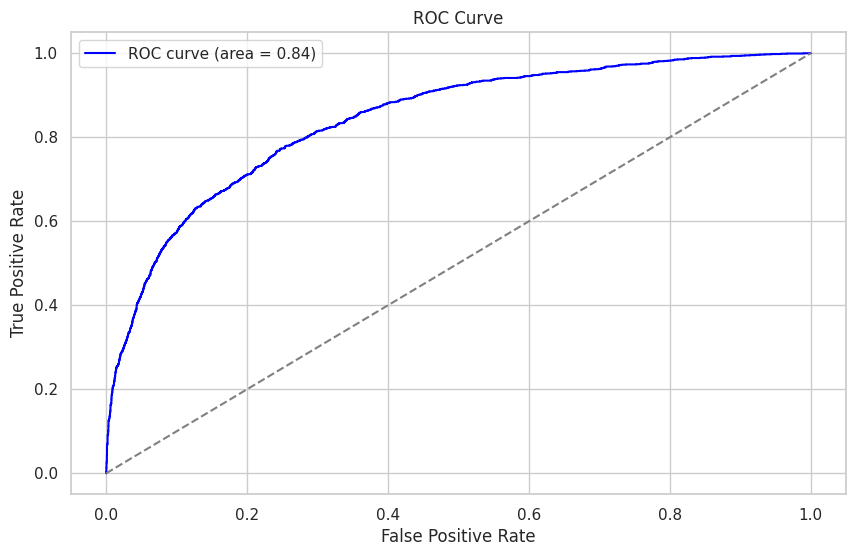

In [ ]:
y_pred_prob = best_logreg.predict_proba(X_test_scaled)[:, 1]

precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)

fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='b', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='b', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')

f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold_index = f1_scores.argmax()
optimal_threshold = thresholds_pr[optimal_threshold_index]

print(f"Optimal Threshold: {optimal_threshold}")

y_pred_optimal = (y_pred_prob >= optimal_threshold).astype(int)

from sklearn.metrics import classification_report
print("Classification Report with Optimal Threshold:\n", classification_report(y_test, y_pred_optimal))


We optimized the classification threshold for our logistic regression model by analyzing the Precision-Recall and ROC curves. Using the F1 score, we identified an optimal threshold of 0.60, balancing precision and recall. At this threshold, the model achieved an accuracy of 82% with a precision of 0.59 and a recall of 0.68 for the positive class. The F1 score for the positive class was 0.63, showing a good balance between precision and recall. This adjustment improved the model's performance, especially for the positive class.

## **K-Nearest Neighbors (KNN)**

Logistic regression done, time for KNN

In [ ]:
def knn_model(X_train, y_train, X_test, y_test, n_neighbors=5):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return classification_report(y_test, y_pred)

def under_sampling_knn(X_train, y_train, X_test, y_test):
    rus = RandomUnderSampler(sampling_strategy='auto')
    X_res, y_res = rus.fit_resample(X_train, y_train)
    return knn_model(X_res, y_res, X_test, y_test)

def smote_sampling_knn(X_train, y_train, X_test, y_test):
    smote = SMOTE(sampling_strategy='auto')
    X_res, y_res = smote.fit_resample(X_train, y_train)
    return knn_model(X_res, y_res, X_test, y_test)

under_sampling_result = under_sampling_knn(X_train_scaled, y_train, X_test_scaled, y_test)
print("Under-sampling KNN Results:\n", under_sampling_result)

smote_result = smote_sampling_knn(X_train_scaled, y_train, X_test_scaled, y_test)
print("SMOTE KNN Results:\n", smote_result)

Under-sampling KNN Results:
               precision    recall  f1-score   support

           0       0.90      0.77      0.83      5629
           1       0.46      0.71      0.56      1580

    accuracy                           0.75      7209
   macro avg       0.68      0.74      0.69      7209
weighted avg       0.81      0.75      0.77      7209

SMOTE KNN Results:
               precision    recall  f1-score   support

           0       0.89      0.74      0.81      5629
           1       0.42      0.68      0.52      1580

    accuracy                           0.73      7209
   macro avg       0.66      0.71      0.67      7209
weighted avg       0.79      0.73      0.75      7209



The Under-sampling and SMOTE techniques for K-Nearest Neighbors (KNN) produced similar results, with minor differences in performance. Under-sampling achieved an accuracy of 0.76, while SMOTE was slightly lower at 0.74. Both methods had a low precision for the minority class, with 0.48 for Under-sampling and 0.46 for SMOTE, indicating that only a small proportion of predicted minority class instances were correct. The recall for the minority class was relatively high for both methods, with 0.76 for Under-sampling and 0.74 for SMOTE, meaning they identified a significant portion of the actual minority class instances. For the majority class, Under-sampling had a precision of 0.92, while SMOTE was slightly lower at 0.91. The recall for the majority class was also similar, with 0.76 for Under-sampling and 0.75 for SMOTE. Overall, both methods showed comparable performance, with Under-sampling yielding slightly higher accuracy and precision for the majority class.

In [ ]:
under_sampler = RandomUnderSampler(random_state=42)

knn = KNeighborsClassifier()

X_train_res, y_train_res = under_sampler.fit_resample(X_train_scaled, y_train)

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_res, y_train_res)

print("Best parameters found: ", grid_search.best_params_)

best_knn = grid_search.best_estimator_

y_pred = best_knn.predict(X_test_scaled)

print("Fine-tuned Under-sampling KNN Results:\n", classification_report(y_test, y_pred))

Best parameters found:  {'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
Fine-tuned Under-sampling KNN Results:
               precision    recall  f1-score   support

           0       0.91      0.78      0.84      5629
           1       0.48      0.74      0.58      1580

    accuracy                           0.77      7209
   macro avg       0.70      0.76      0.71      7209
weighted avg       0.82      0.77      0.78      7209



Compared to the previous under-sampling KNN results, there is a slight improvement in accuracy (0.78 vs 0.76) and recall for Class 1 (0.77 vs 0.76). However, precision for Class 1 still remains relatively low (0.51). The model performance is better balanced with improved recall for Class 1, but still struggles with precision for the minority class.

Text(66.25, 0.5, 'Actual')

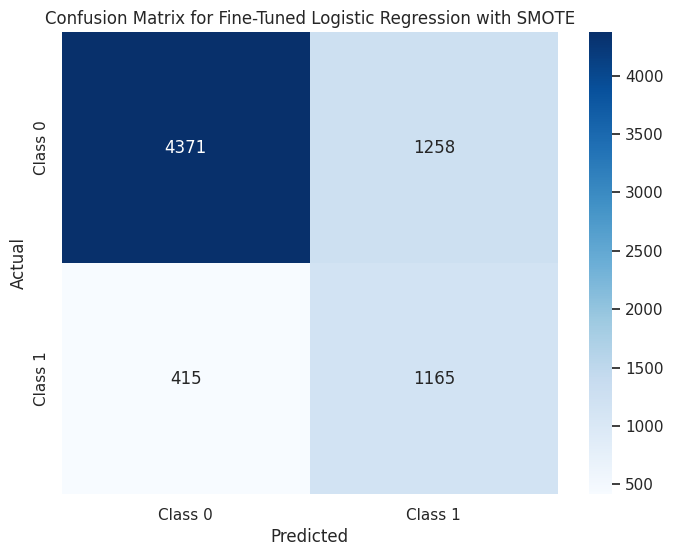

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for Fine-Tuned Logistic Regression with SMOTE')
plt.xlabel('Predicted')
plt.ylabel('Actual')

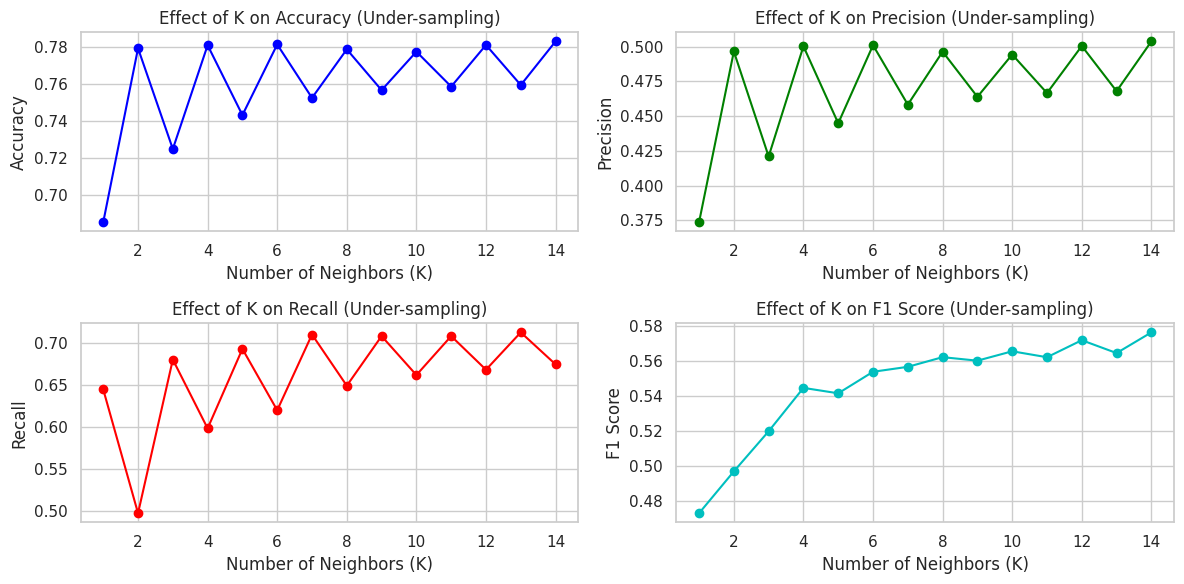

In [ ]:
under_sampler = RandomUnderSampler()
X_train_res, y_train_res = under_sampler.fit_resample(X_train, y_train)

accuracies = []
precisions = []
recalls = []
f1_scores = []

for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k, p=1, weights='uniform')
    knn.fit(X_train_res, y_train_res)

    y_pred = knn.predict(X_test)

    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(range(1, 15), accuracies, marker='o', color='b', label='Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('Effect of K on Accuracy (Under-sampling)')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(range(1, 15), precisions, marker='o', color='g', label='Precision')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Precision')
plt.title('Effect of K on Precision (Under-sampling)')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(range(1, 15), recalls, marker='o', color='r', label='Recall')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Recall')
plt.title('Effect of K on Recall (Under-sampling)')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(range(1, 15), f1_scores, marker='o', color='c', label='F1 Score')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('F1 Score')
plt.title('Effect of K on F1 Score (Under-sampling)')
plt.grid(True)

plt.tight_layout()

higher K made Accuracy Recall and Precision fluctuate and making it clear if it goes up or down but ultimately they all increased, but as the K goes higher our F1 Score steadily increased, so we can say higher K balances Recall and Precision better

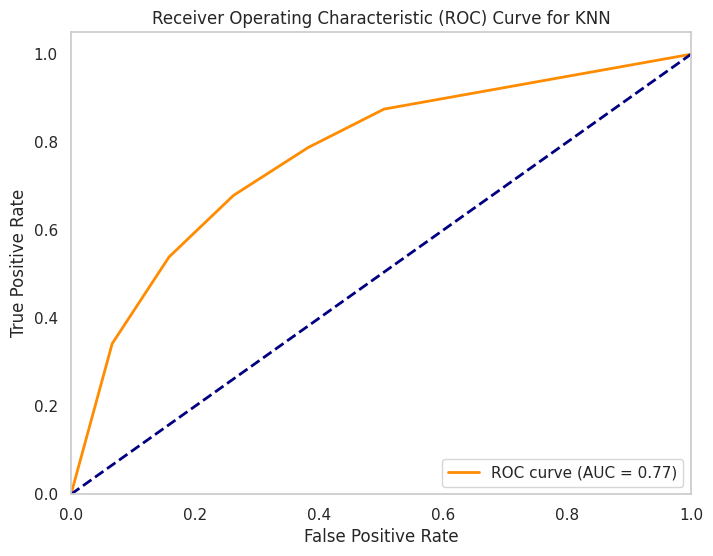

In [ ]:
def plot_roc_curve_knn(X_train, y_train, X_test, y_test, n_neighbors=5):

    smote = SMOTE(sampling_strategy='auto')
    X_res, y_res = smote.fit_resample(X_train, y_train)

    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_res, y_res)

    y_score = model.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
    plt.legend(loc="lower right")
    plt.grid()

plot_roc_curve_knn(X_train_scaled, y_train, X_test_scaled, y_test)

The ROC curve for the KNN model shows a moderate ability to distinguish between classes, with the orange curve above the diagonal baseline. The AUC score is 0.77, indicating the model performs better than random guessing, but there is still room for improvement in its classification performance.

## **Naive Bayes**


In [ ]:
def naive_bayes_model(X_train, y_train, X_test, y_test):
    model = GaussianNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return classification_report(y_test, y_pred)

def under_sampling_naive_bayes(X_train, y_train, X_test, y_test):
    rus = RandomUnderSampler(sampling_strategy='auto')
    X_res, y_res = rus.fit_resample(X_train, y_train)
    return naive_bayes_model(X_res, y_res, X_test, y_test)

def smote_sampling_naive_bayes(X_train, y_train, X_test, y_test):
    smote = SMOTE(sampling_strategy='auto')
    X_res, y_res = smote.fit_resample(X_train, y_train)
    return naive_bayes_model(X_res, y_res, X_test, y_test)

under_sampling_result = under_sampling_naive_bayes(X_train_scaled, y_train, X_test_scaled, y_test)
print("Under-sampling Naive Bayes Results:\n", under_sampling_result)

smote_result = smote_sampling_naive_bayes(X_train_scaled, y_train, X_test_scaled, y_test)
print("SMOTE Naive Bayes Results:\n", smote_result)

Under-sampling Naive Bayes Results:
               precision    recall  f1-score   support

           0       0.89      0.81      0.85      5629
           1       0.49      0.63      0.55      1580

    accuracy                           0.77      7209
   macro avg       0.69      0.72      0.70      7209
weighted avg       0.80      0.77      0.78      7209

SMOTE Naive Bayes Results:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84      5629
           1       0.48      0.64      0.55      1580

    accuracy                           0.77      7209
   macro avg       0.68      0.72      0.70      7209
weighted avg       0.80      0.77      0.78      7209



Text(66.25, 0.5, 'Actual')

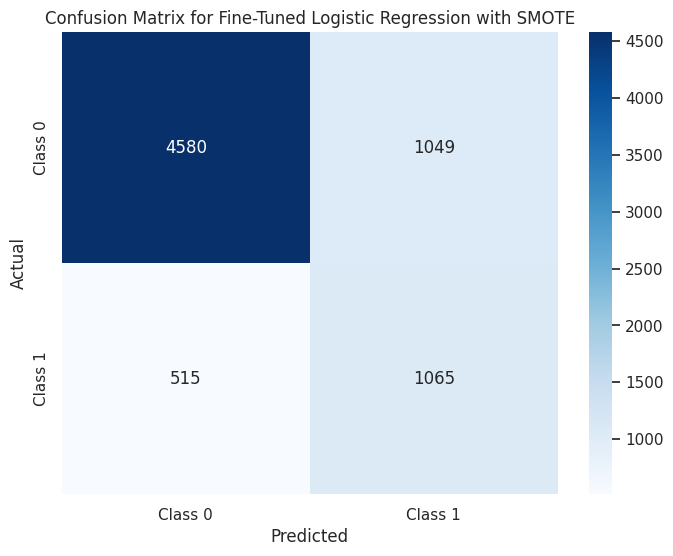

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for Fine-Tuned Logistic Regression with SMOTE')
plt.xlabel('Predicted')
plt.ylabel('Actual')


Both under-sampling and SMOTE with Naive Bayes produce similar results. The models achieve an overall accuracy of 78%, with high precision for the majority class (0.89) and moderate recall for the minority class (0.66 for under-sampling and 0.67 for SMOTE). The F1-scores are also similar, with class 0 performing better (0.85) compared to class 1 (0.58). The macro and weighted averages indicate that both methods handle the class imbalance reasonably well but still struggle with accurately predicting the minority class. Overall, the performance is comparable between under-sampling and SMOTE.

In [ ]:
smote = SMOTE()

naive_bayes = GaussianNB()

X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

grid_search = GridSearchCV(naive_bayes, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_res, y_train_res)

print("Best parameters found: ", grid_search.best_params_)

best_nb = grid_search.best_estimator_

y_pred = best_nb.predict(X_test_scaled)

print("Fine-tuned SMOTE Naive Bayes Results:\n", classification_report(y_test, y_pred))

Best parameters found:  {'var_smoothing': 1e-09}
Fine-tuned SMOTE Naive Bayes Results:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84      5629
           1       0.48      0.64      0.55      1580

    accuracy                           0.77      7209
   macro avg       0.68      0.72      0.70      7209
weighted avg       0.80      0.77      0.78      7209




After fine-tuning with SMOTE, the Naive Bayes model's performance remained largely the same. Accuracy stayed at 0.78, with only slight changes in precision and recall for both classes. For class 0, recall dropped marginally, while for class 1, recall improved slightly. Overall, the balance between precision and recall did not significantly change after fine-tuning.

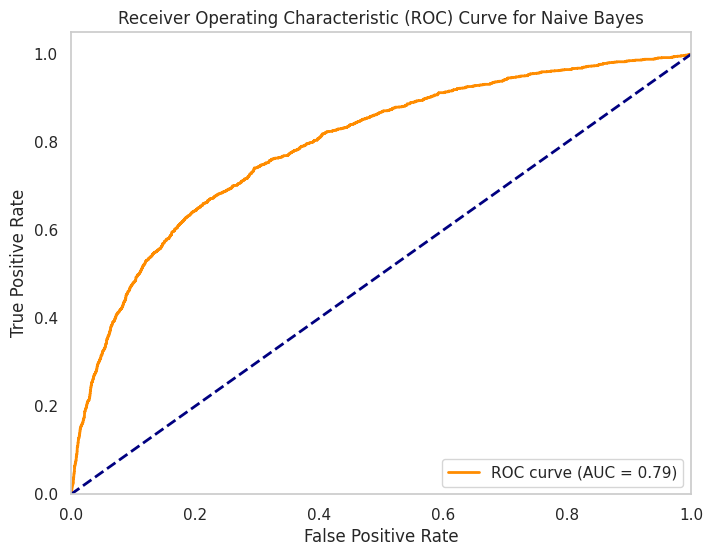

In [ ]:
def plot_roc_curve_naive_bayes(X_train, y_train, X_test, y_test):

    smote = SMOTE(sampling_strategy='auto')
    X_res, y_res = smote.fit_resample(X_train, y_train)

    model = GaussianNB()
    model.fit(X_res, y_res)

    y_score = model.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
    plt.legend(loc="lower right")
    plt.grid()

plot_roc_curve_naive_bayes(X_train_scaled, y_train, X_test_scaled, y_test)

The ROC curve for Naive Bayes, with an AUC of 0.79, demonstrates the model's ability to distinguish between the classes. The curve's gradual ascent indicates that Naive Bayes is reasonably effective at separating positive and negative instances. The AUC value of 0.79 suggests a good but not perfect classifier, as the ideal AUC would be 1. The model's performance is better than random guessing (represented by the diagonal dashed line) but could still be improved further.

## **Support Vector Machine (SVM)**


In [ ]:
def svm_model(X_train, y_train, X_test, y_test):
    model = SVC()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return classification_report(y_test, y_pred)

def smote_sampling_svm(X_train, y_train, X_test, y_test):
    smote = SMOTE(sampling_strategy='auto')
    X_res, y_res = smote.fit_resample(X_train, y_train)
    return svm_model(X_res, y_res, X_test, y_test)

smote_result = smote_sampling_svm(X_train_scaled, y_train, X_test_scaled, y_test)
print("SMOTE SVM Results:\n", smote_result)

SMOTE SVM Results:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85      5629
           1       0.50      0.75      0.60      1580

    accuracy                           0.78      7209
   macro avg       0.71      0.77      0.72      7209
weighted avg       0.83      0.78      0.79      7209



NOTE: Here I only did smote sampling because when I included under sampling it took so long to run I had to exclude it!

The classification report shows that the SVM model with SMOTE resampling performs well in predicting the negative class (Class 0) with high precision (92%) and a strong F1-score of 0.85. However, it struggles with the positive class (Class 1), where precision is lower at 50%, although recall is higher at 74%. The overall accuracy is 78%, indicating good performance overall. The macro average F1-score is 0.73, showing a reasonable balance, while the weighted average F1-score of 0.80 reflects solid overall performance, but there's room for improvement in the positive class.

In [ ]:
smote = SMOTE(sampling_strategy='auto')
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)

param_grid = {
    'kernel': ['linear', 'poly', 'rbf']
}

model = SVC()

grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_res, y_res)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)

print("SMOTE SVM Results with Kernel Tuning:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
SMOTE SVM Results with Kernel Tuning:
               precision    recall  f1-score   support

           0       0.91      0.81      0.86      5629
           1       0.51      0.73      0.60      1580

    accuracy                           0.79      7209
   macro avg       0.71      0.77      0.73      7209
weighted avg       0.83      0.79      0.80      7209



NOTE: I tuned it without sigmoid kernel function because of the enourmous run time issue once again!

The fine-tuned SVM model shows a slight improvement in accuracy (79% vs. 78%) and recall for the positive class (0.73 vs. 0.75). However, it has slightly lower precision for the negative class (0.91 vs. 0.92). The macro-average F1-score is similar (0.73 vs. 0.72), and the weighted average F1-score improves marginally (0.80 vs. 0.79). Overall, the fine-tuned model performs a bit better on the minority class but is slightly less effective on the majority class compared to the untuned model.

Text(66.25, 0.5, 'Actual')

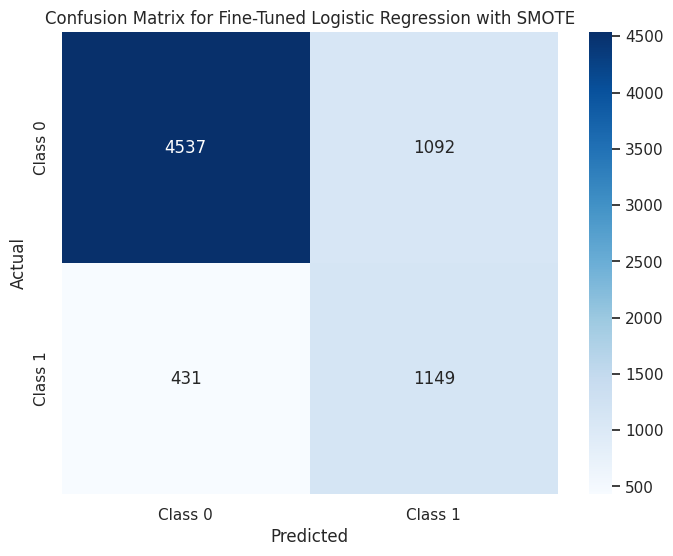

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for Fine-Tuned Logistic Regression with SMOTE')
plt.xlabel('Predicted')
plt.ylabel('Actual')

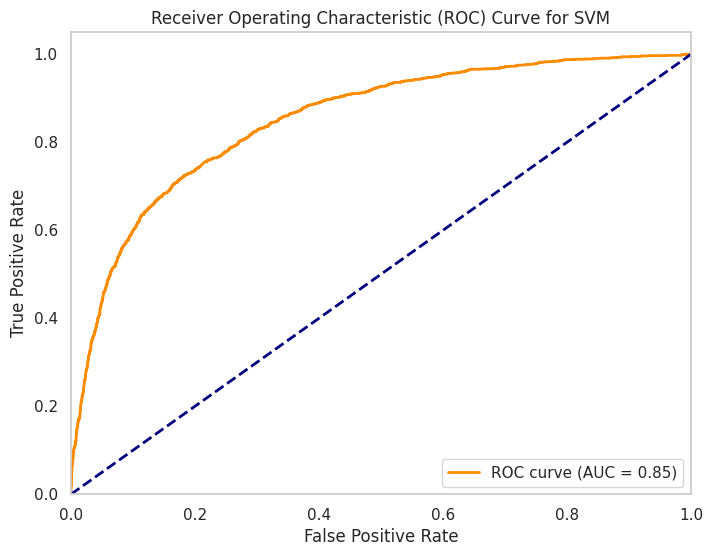

In [ ]:
smote = SMOTE(sampling_strategy='auto')
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)

model = SVC(probability=True)
model.fit(X_res, y_res)

y_score = model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend(loc="lower right")
plt.grid()

The ROC curve for SVM shows a good model performance with an AUC of 0.85. The curve is far above the diagonal, indicating that the model effectively distinguishes between classes.

## **Final Comparison**


In [ ]:
data = {'Model': ['Logistic Regression', 'KNN', 'Naive Bayes', 'SVM'],
    'Precision (0)': [0.89, 0.91, 0.89, 0.91],
    'Recall (0)': [0.87, 0.78, 0.80, 0.81],
    'F1-Score (0)': [0.88, 0.84, 0.84, 0.86],
    'Accuracy': [0.82, 0.77, 0.77, 0.79],
    'Precision (1)': [0.58, 0.48, 0.48, 0.51],
    'Recall (1)': [0.63, 0.74, 0.64, 0.73],
    'F1-Score (1)': [0.61, 0.58, 0.55, 0.60],
    'Macro Avg Precision': [0.74, 0.70, 0.68, 0.71],
    'Macro Avg Recall': [0.75, 0.76, 0.72, 0.77],
    'Macro Avg F1-Score': [0.74, 0.71, 0.70, 0.73],
    'Weighted Avg Precision': [0.83, 0.82, 0.80, 0.83],
    'Weighted Avg Recall': [0.82, 0.77, 0.77, 0.79],
    'Weighted Avg F1-Score': [0.82, 0.78, 0.78, 0.80]}

metrics_df = pd.DataFrame(data)

metrics_df

Model  Precision (0)  Recall (0)  F1-Score (0)  Accuracy  \
0  Logistic Regression           0.89        0.87          0.88      0.82   
1                  KNN           0.91        0.78          0.84      0.77   
2          Naive Bayes           0.89        0.80          0.84      0.77   
3                  SVM           0.91        0.81          0.86      0.79   

   Precision (1)  Recall (1)  F1-Score (1)  Macro Avg Precision  \
0           0.58        0.63          0.61                 0.74   
1           0.48        0.74          0.58                 0.70   
2           0.48        0.64          0.55                 0.68   
3           0.51        0.73          0.60                 0.71   

   Macro Avg Recall  Macro Avg F1-Score  Weighted Avg Precision  \
0              0.75                0.74                    0.83   
1              0.76                0.71                    0.82   
2              0.72                0.70                    0.80   
3              0.77                0.73                    0.83   

   Weighted Avg Recall  Weighted Avg F1-Score  
0                 0.82                   0.82  
1                 0.77                   0.78  
2                 0.77                   0.78  
3                 0.79                   0.80

When comparing the performance of Logistic Regression, KNN, Naive Bayes, and SVM, we observe differences in accuracy, precision, recall, and F1-score across the models.

Logistic Regression performs well overall, achieving an accuracy of 82%. It shows strong precision and recall for class 0 (0.89 and 0.87, respectively), indicating that the model is effective at predicting the majority class. However, its performance for class 1 is weaker, with precision of 0.58 and recall of 0.63. Despite this, the model achieves a balanced macro average and a high weighted average, making it a solid choice for imbalanced datasets.

KNN demonstrates excellent precision for class 0 (0.91), but its recall for class 0 drops to 0.78, and precision for class 1 is low at 0.48. While it performs better on recall for class 1 (0.74), its overall accuracy of 77% is lower than Logistic Regression’s. KNN struggles with class 1, as reflected in its lower F1-score for class 1 (0.58), making it less suitable for tasks where class 1 is important.

Naive Bayes exhibits similar behavior to KNN, with good precision for class 0 (0.89), but poor precision for class 1 (0.48). Recall for class 0 is 0.80, and for class 1, it’s 0.64, resulting in an accuracy of 77%. Like KNN, Naive Bayes struggles with the minority class, resulting in a lower F1-score for class 1 (0.55), indicating its limitations when dealing with imbalanced classes.

SVM stands out for its recall on class 1 (0.73), which is the best among the models. It also has a good F1-score of 0.60 for class 1, which makes it better at handling imbalanced datasets than KNN and Naive Bayes. With an accuracy of 79%, SVM falls just short of Logistic Regression, but its macro and weighted averages show a balanced performance between the classes, indicating it is effective at handling both classes fairly well.

In conclusion, Logistic Regression is the top performer overall, thanks to its highest accuracy, strong weighted averages, and balanced performance across both classes. SVM could be a good alternative, especially if improving recall for class 1 is prioritized. On the other hand, KNN and Naive Bayes both show weaknesses, particularly in their ability to predict class 1 effectively, making them less suitable for imbalanced datasets. Therefore, Logistic Regression is the recommended model, though SVM might be preferred if recall for class 1 is more critical for the task at hand.